Complete an unsupervised learning project
21.5 hoursEstimated completion time
Overview
For your third capstone, you'll complete an unsupervised learning project.
In this capstone, you'll focus on the following guiding question:

How can you use clustering techniques to answer your research question?

You can choose your own research question or select one of the questions below.

1. Netflix wants to identify similar movies based on movie characteristics. --> **Hierarchial clustering is a powerful type of clustering algorithm that can be used to identify relationships between data points and clusters.**

2. A company wants to segment its customers. --> **K-Means clustering algorithm is suitable for customer segmentation**

3. Your startup is creating an innovative new email software. How can you help them create an effective spam filter? --> **Hierarchial clustering can be used**

4. Your chief marketing officer wants to know how much website traffic is due to spam and bots versus actual customers. How can you group the traffic? --> **k-means clustering algorithm or DB scan**

5. Your spouse loves fantasy baseball and has a few favorite players. How can you help them to choose who to have on their team? --> **k-means clustering algorithm**

6. The security team in a bank wants to identify fraudulent transactional activities. --> **K means and DBscan can be used to effectively group similar anomalies together aiding in the detection of unusal activities.**

For the unSupervisedLearningProject use this dataset from Kaggle:
https://www.kaggle.com/code/maso0dahmed/netflix-movies-and-shows-eda

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
## one time execution
#!kaggle datasets download -d maso0dahmed/netflix-movies-and-shows
#!kaggle datasets download -d bharatnatrayn/movies-dataset-for-feature-extracion-prediction
!kaggle kernels pull maso0dahmed/netflix-movies-and-shows-eda

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 18.4MB/s]


In [ ]:
## one time execution
import zipfile

# Define the path to your zip file
file_path = '/content/movies-dataset-for-feature-extracion-prediction.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/imdb_movies_shows.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      5805 non-null   object
 1   type                       5806 non-null   object
 2   release_year               5806 non-null   int64 
 3   age_certification          5806 non-null   object
 4   runtime                    5806 non-null   int64 
 5   genres                     5806 non-null   object
 6   production_countries       5806 non-null   object
 7   seasons                    5806 non-null   int64 
 8   imdb_id                    5806 non-null   object
 9   imdb_score                 5806 non-null   int64 
 10  imdb_votes                 5806 non-null   int64 
 11  NoOfGenres                 5806 non-null   int64 
 12  NoOfcountries              5806 non-null   int64 
 13  HowMuchOld                 5806 non-null   int64 
 14  show_typ

In [ ]:
df.head()

title   type  release_year age_certification  \
0  Five Came Back: The Reference Films   SHOW          1945             TV-MA   
1                          Taxi Driver  MOVIE          1976                 R   
2      Monty Python and the Holy Grail  MOVIE          1975                PG   
3                        Life of Brian  MOVIE          1979                 R   
4                         The Exorcist  MOVIE          1973                 R   

   runtime                 genres production_countries  seasons    imdb_id  \
0       48      ['documentation']               ['US']      1.0        NaN   
1      113     ['crime', 'drama']               ['US']      NaN  tt0075314   
2       91  ['comedy', 'fantasy']               ['GB']      NaN  tt0071853   
3       94             ['comedy']               ['GB']      NaN  tt0079470   
4      133             ['horror']               ['US']      NaN  tt0070047   

   imdb_score  imdb_votes  
0         NaN         NaN  
1         8.3    795222.0  
2         8.2    530877.0  
3         8.0    392419.0  
4         8.1    391942.0

In [ ]:
pip install wordcloud

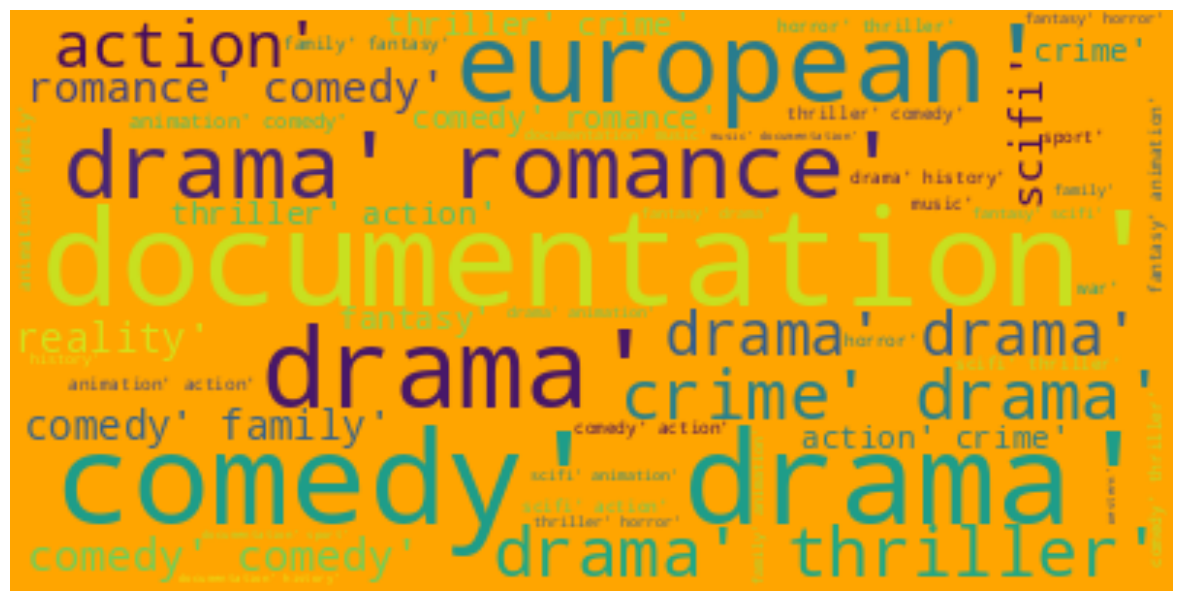

In [ ]:
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(df["genres"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

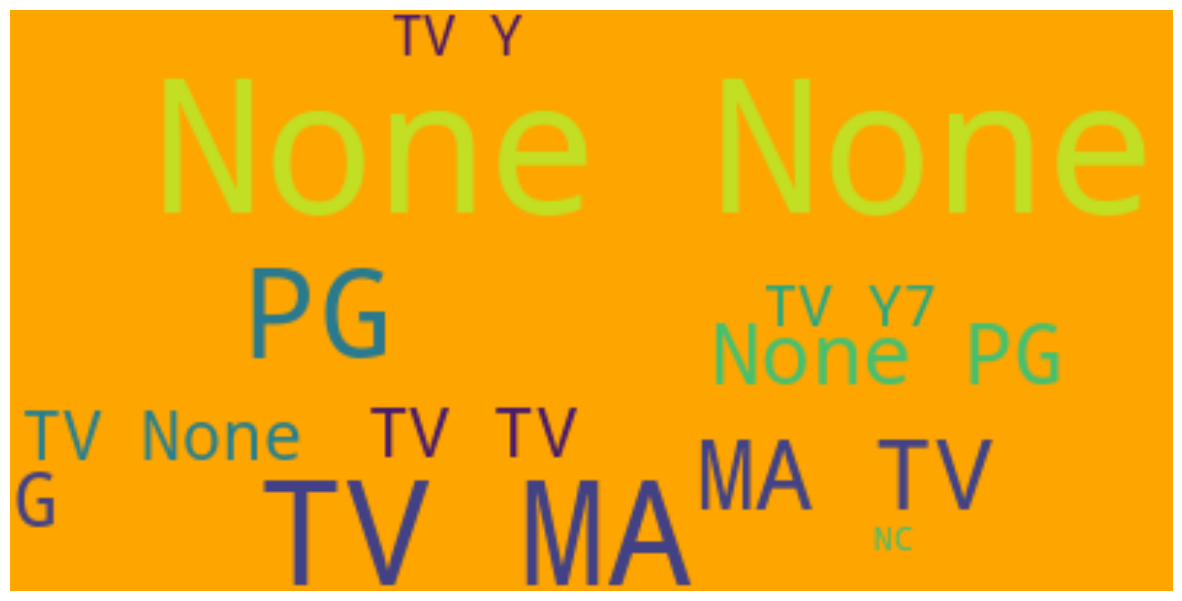

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(df["age_certification"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

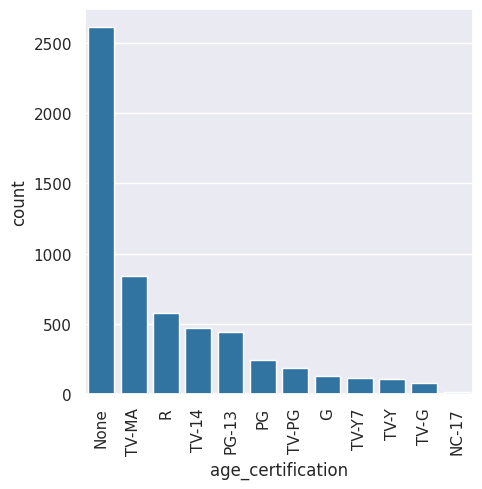

In [ ]:
plt.figure(figsize= (5,5))

sns.countplot(x ='age_certification', data=df, color='#1f77b4', order = df['age_certification'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

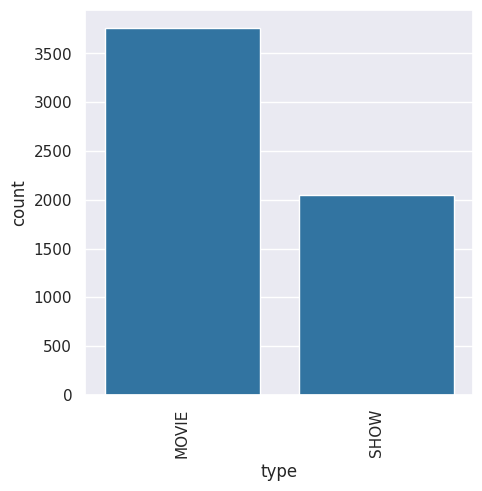

In [ ]:
plt.figure(figsize= (5,5))

sns.countplot(x ='type', data=df, color='#1f77b4', order = df['type'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

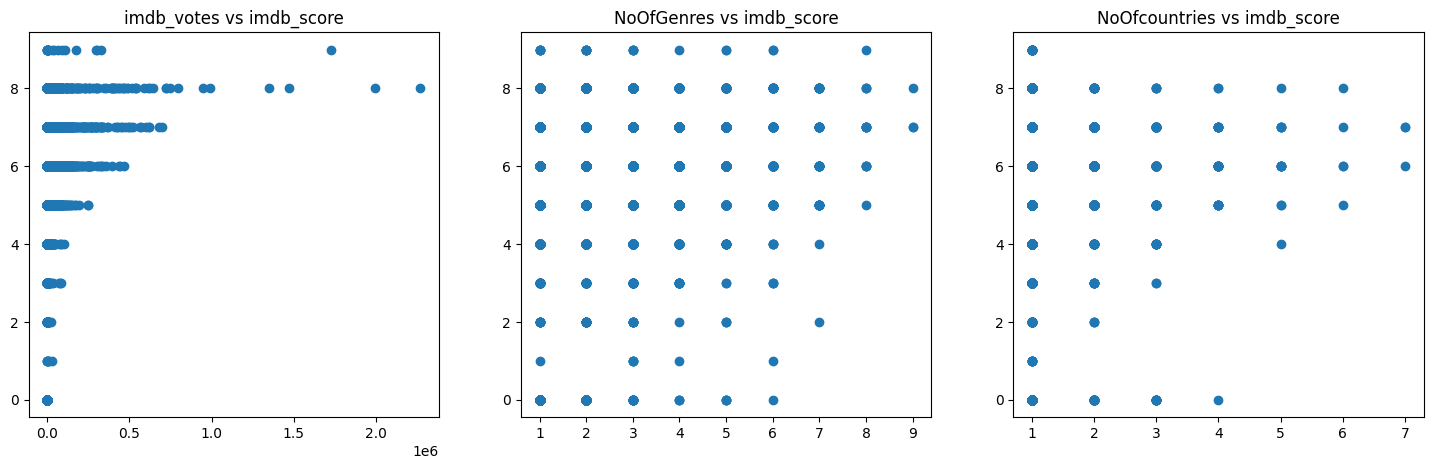

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(df["imdb_votes"], df["imdb_score"])
plt.title("imdb_votes vs imdb_score")

plt.subplot(1,3,2)
plt.scatter(df["NoOfGenres"], df["imdb_score"])
plt.title("NoOfGenres vs imdb_score")

plt.subplot(1,3,3)
plt.scatter(df["NoOfcountries"], df["imdb_score"])
plt.title("NoOfcountries vs imdb_score")

plt.show()

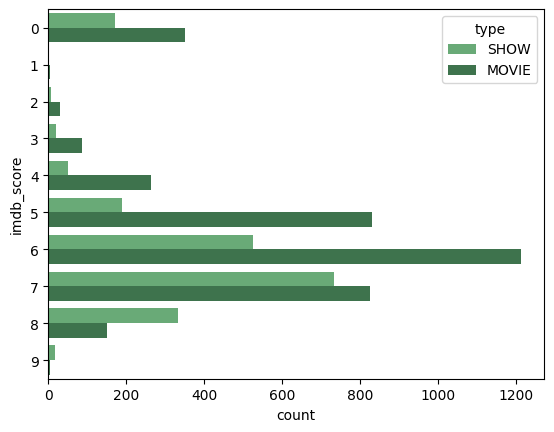

In [ ]:
import seaborn as sns
# Plot counts for each combination of levels.
sns.countplot(y="imdb_score", hue="type", data=df, palette="Greens_d")
plt.show()

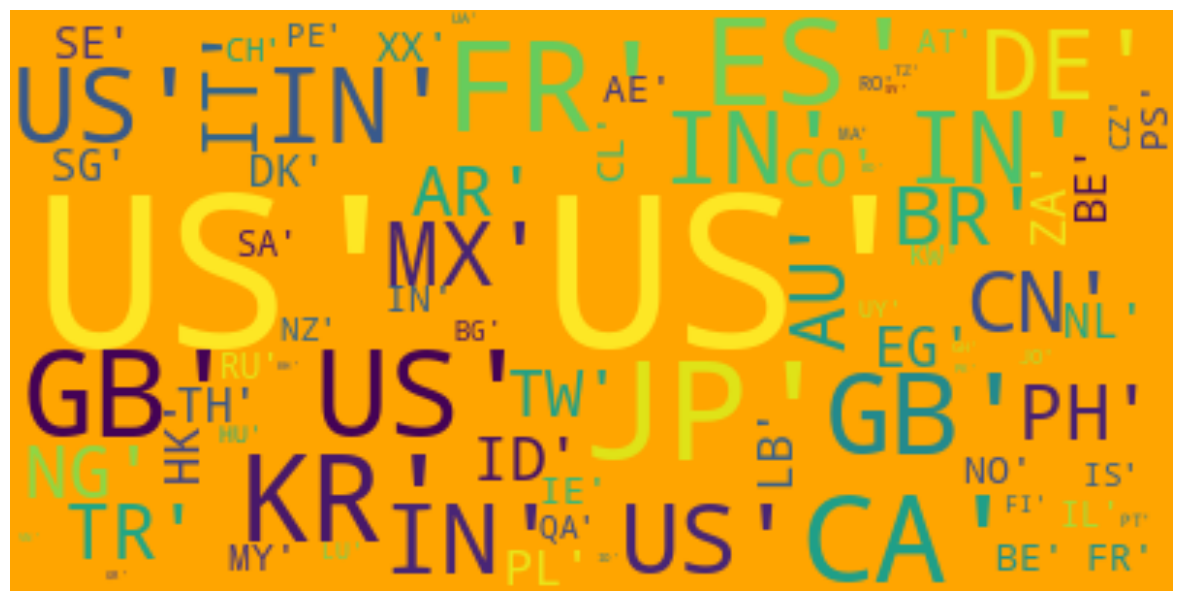

In [ ]:
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(df["production_countries"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# Derive averages by group
df.groupby("type").mean()

release_year    runtime   seasons  imdb_score    imdb_votes  \
type                                                                 
MOVIE   2015.371641  98.785315  0.000000    5.274275  24070.973397   
SHOW    2017.191988  38.821202  2.165608    6.018564  16024.869077   

       NoOfGenres  NoOfcountries  HowMuchOld  show_type   US_prod  ...  \
type                                                               ...   
MOVIE    2.402501       1.223198    8.628359        0.0  0.635275  ...   
SHOW     2.733268       1.039570    6.808012        1.0  0.257450  ...   

          crime    comedy     sport     drama  documentation       war  \
type                                                                     
MOVIE  0.139399  0.410482  0.029529  0.495877       0.156957  0.025007   
SHOW   0.179287  0.354665  0.026869  0.506595       0.156326  0.026869   

          music   western   history   reality  
type                                           
MOVIE  0.045757  0.008247  0.036446  0.002394  
SHOW   0.032242  0.006351  0.046898  0.104543  

[2 rows x 48 columns]

In [ ]:
# Derive averages by group
df.groupby("imdb_score").mean()

release_year    runtime   seasons     imdb_votes  NoOfGenres  \
imdb_score                                                                 
0            2017.361377  61.927342  0.430210       0.000000    1.315488   
1            2018.428571  76.428571  0.428571    6337.571429    3.285714   
2            2016.861111  85.555556  0.250000    2231.027778    2.416667   
3            2017.235849  86.066038  0.424528    5133.650943    2.339623   
4            2016.453674  88.440895  0.376997    5436.143770    2.460064   
5            2016.923454  86.390579  0.344455   10080.825319    2.684985   
6            2015.953970  80.897008  0.607595   16303.077100    2.588608   
7            2015.463117  74.541373  1.052598   26492.796023    2.656831   
8            2014.138430  65.845041  1.946281   78122.237603    2.830579   
9            2012.285714  61.095238  2.047619  152133.095238    3.000000   

            NoOfcountries  HowMuchOld  show_type   US_prod   IN_prod  ...  \
imdb_score                                                            ...   
0                1.116635    6.638623   0.326960  0.233270 -0.804971  ...   
1                1.000000    5.571429   0.428571 -1.000000 -0.142857  ...   
2                1.083333    7.138889   0.166667 -0.250000 -0.333333  ...   
3                1.103774    6.764151   0.188679  0.386792 -0.377358  ...   
4                1.140575    7.546326   0.159744  0.466454 -0.539936  ...   
5                1.178606    7.076546   0.184495  0.613346 -0.629048  ...   
6                1.193326    8.046030   0.302071  0.531070 -0.708285  ...   
7                1.154586    8.536883   0.470815  0.583708 -0.667094  ...   
8                1.086777    9.861570   0.688017  0.351240 -0.609504  ...   
9                1.000000   11.714286   0.809524 -0.285714 -0.428571  ...   

               crime    comedy     sport     drama  documentation       war  \
imdb_score                                                                    
0           0.036329  0.223709  0.001912  0.244742       0.181644  0.007648   
1           0.000000  0.857143  0.142857  0.714286       0.000000  0.000000   
2           0.083333  0.416667  0.027778  0.416667       0.138889  0.000000   
3           0.103774  0.490566  0.018868  0.349057       0.028302  0.018868   
4           0.108626  0.469649  0.031949  0.418530       0.041534  0.006390   
5           0.142296  0.470069  0.023553  0.476938       0.060844  0.012758   
6           0.170311  0.397583  0.025892  0.518412       0.142693  0.020713   
7           0.192431  0.360487  0.037203  0.570879       0.240539  0.046183   
8           0.163223  0.404959  0.047521  0.611570       0.212810  0.041322   
9           0.190476  0.190476  0.047619  0.571429       0.285714  0.000000   

               music   western   history   reality  
imdb_score                                          
0           0.028681  0.005736  0.000000  0.028681  
1           0.142857  0.000000  0.000000  0.000000  
2           0.055556  0.000000  0.000000  0.138889  
3           0.028302  0.018868  0.028302  0.037736  
4           0.028754  0.006390  0.003195  0.060703  
5           0.035329  0.005888  0.013739  0.037291  
6           0.045455  0.008631  0.037399  0.035098  
7           0.047466  0.008339  0.074407  0.039128  
8           0.039256  0.006198  0.064050  0.039256  
9           0.000000  0.000000  0.142857  0.047619  

[10 rows x 47 columns]

In [ ]:
# Derive averages by group
df.groupby("age_certification").mean()

release_year     runtime   seasons  imdb_score  \
age_certification                                                   
G                   2013.435115   92.167939  0.000000    4.755725   
NC-17               2014.142857   95.214286  0.000000    5.428571   
None                2016.483142   89.874330  0.148659    5.109962   
PG                  2013.032520  104.069106  0.000000    5.585366   
PG-13               2014.022727  107.875000  0.000000    5.752273   
R                   2014.161739  105.452174  0.000000    5.591304   
TV-14               2016.204255   41.770213  2.470213    6.321277   
TV-G                2013.776316   26.657895  3.631579    5.618421   
TV-MA               2018.331748   43.589774  1.711058    6.223543   
TV-PG               2015.865591   35.526882  2.564516    5.967742   
TV-Y                2015.752381   16.380952  3.009524    5.457143   
TV-Y7               2015.991071   22.107143  3.357143    6.026786   

                     imdb_votes  NoOfGenres  NoOfcountries  HowMuchOld  \
age_certification                                                        
G                   6170.877863    2.267176       1.152672   10.564885   
NC-17              14997.500000    3.928571       1.000000    9.857143   
None                4208.315709    2.165517       1.165517    7.516858   
PG                 34602.203252    3.231707       1.207317   10.967480   
PG-13              63385.345455    2.711364       1.286364    9.977273   
R                  73642.462609    2.779130       1.382609    9.838261   
TV-14              22268.891489    2.765957       1.025532    7.795745   
TV-G                4465.000000    3.000000       1.026316   10.223684   
TV-MA              22805.702735    2.688466       1.028537    5.668252   
TV-PG               9422.462366    2.338710       1.048387    8.134409   
TV-Y                 645.800000    2.961905       1.104762    8.247619   
TV-Y7               6534.196429    4.473214       1.116071    8.008929   

                   show_type   US_prod  ...     crime    comedy     sport  \
age_certification                       ...                                 
G                   0.000000  0.396947  ...  0.022901  0.442748  0.015267   
NC-17               0.000000  0.071429  ...  0.357143  0.285714  0.000000   
None                0.098467  0.073563  ...  0.116092  0.410345  0.019923   
PG                  0.000000  1.073171  ...  0.093496  0.597561  0.089431   
PG-13               0.000000  1.127273  ...  0.118182  0.411364  0.050000   
R                   0.000000  2.250435  ...  0.297391  0.290435  0.027826   
TV-14               1.000000  0.187234  ...  0.136170  0.338298  0.034043   
TV-G                1.000000  0.894737  ...  0.000000  0.526316  0.052632   
TV-MA               1.000000  0.152200  ...  0.313912  0.288942  0.033294   
TV-PG               1.000000  0.629032  ...  0.021505  0.344086  0.016129   
TV-Y                1.000000  0.742857  ...  0.009524  0.504762  0.000000   
TV-Y7               1.000000  1.223214  ...  0.008929  0.732143  0.008929   

                      drama  documentation       war     music   western  \
age_certification                                                          
G                  0.335878       0.076336  0.007634  0.076336  0.000000   
NC-17              0.714286       0.142857  0.071429  0.000000  0.000000   
None               0.468582       0.188889  0.018391  0.047510  0.003448   
PG                 0.483740       0.117886  0.008130  0.044715  0.004065   
PG-13              0.570455       0.109091  0.038636  0.038636  0.013636   
R                  0.565217       0.092174  0.055652  0.033043  0.027826   
TV-14              0.612766       0.144681  0.029787  0.027660  0.006383   
TV-G               0.250000       0.171053  0.000000  0.078947  0.000000   
TV-MA              0.623068       0.189061  0.039239  0.022592  0.007134   
TV-PG              0.327957       0.172043  0.005376  0.037634  0.000000   
TV-Y               0.066

In [ ]:
# Create crosstab of imdb_Score by age certification
count_table = pd.crosstab(df["imdb_score"], df["age_certification"])
count_table

age_certification   G  NC-17  None  PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  \
imdb_score                                                                      
0                  26      1   325   8     16   27     34     4     49     14   
1                   0      0     4   0      0    0      1     0      0      1   
2                   1      0    25   3      0    3      0     0      4      0   
3                   4      1    56   7      9   11      4     4      2      4   
4                   9      1   186  15     27   33      9     2     19      5   
5                  27      3   519  69     92  144     24    20     79     17   
6                  25      3   812  81    154  200     94    23    221     54   
7                  25      4   562  50    124  132    201    16    318     62   
8                  13      1   119  11     18   25     96     6    144     27   
9                   1      0     2   2      0    0      7     1      5      2   

age_certification  TV-Y  TV-Y7  
imdb_score                      
0                    11      8  
1                     1      0  
2                     0      0  
3                     2      2  
4                     5      2  
5                    11     14  
6                    41     30  
7                    27     38  
8                     7     17  
9                     0      1

In [ ]:
# Create crosstab of imdb_Score by age certification
count_table = pd.crosstab(df["imdb_score"], df["type"])
count_table

type        MOVIE  SHOW
imdb_score             
0             352   171
1               4     3
2              30     6
3              86    20
4             263    50
5             831   188
6            1213   525
7             825   734
8             151   333
9               4    17

In [ ]:
df["NoOfGenres"] = df["genres"].str.count(',') + 1

In [ ]:
df["NoOfcountries"] = df["production_countries"].str.count(',') + 1

In [ ]:
df['seasons'] = df['seasons'].fillna(0)

In [ ]:
df['imdb_votes'] = df['imdb_votes'].fillna(0)

In [ ]:
df['imdb_score'] = df['imdb_score'].fillna(0)

In [ ]:
df['imdb_id'] = df['imdb_id'].fillna('None')

In [ ]:
df['age_certification'] = df['age_certification'].fillna('None')

In [ ]:
from  datetime import date
#date.today().year

df["Age"] = date.today().year - df["release_year"]

In [ ]:
df.columns = df.columns.str.replace('Age','HowMuchOld')

In [ ]:
# Create crosstab of imdb_Score by age certification
count_table = pd.crosstab(df["imdb_score"], df["NoOfcountries"])
count_table

NoOfcountries     1    2   3   4  5  6  7
imdb_score                               
0               477   32  13   1  0  0  0
1                 7    0   0   0  0  0  0
2                33    3   0   0  0  0  0
3                97    7   2   0  0  0  0
4               281   22   9   0  1  0  0
5               885  100  24   7  2  1  0
6              1511  156  46  16  6  2  1
7              1395  113  37   7  4  1  2
8               457   19   4   2  1  1  0
9                21    0   0   0  0  0  0

In [ ]:
# Create crosstab of imdb_Score by age certification
count_table = pd.crosstab(df["imdb_score"], df["NoOfGenres"])
count_table

NoOfGenres    1    2    3    4    5   6   7  8  9
imdb_score                                       
0           397  101   17    3    4   1   0  0  0
1             1    0    4    1    0   1   0  0  0
2             8   16    7    1    3   0   1  0  0
3            32   29   30   10    2   3   0  0  0
4            83   86   85   41   13   4   1  0  0
5           204  308  268  135   66  25  12  1  0
6           430  515  400  219  107  45  18  4  0
7           341  504  331  210  111  39  15  6  2
8           108  133  107   63   37  19  13  3  1
9             5    6    4    1    2   2   0  1  0

In [ ]:
df['imdb_votes'] = df['imdb_votes'].astype('int')

In [ ]:
df['imdb_score'] = df['imdb_score'].astype('int')

In [ ]:
df.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'NoOfGenres', 'NoOfcountries', 'HowMuchOld', 'show_type',
       'US_prod', 'IN_prod', 'JP_prod', 'GB_prod', 'KR_prod', 'ES_prod',
       'FR_prod', 'CA_prod', 'MX_prod', 'BR_prod', 'US_Prod_YN', 'IN_Prod_YN',
       'JP_Prod_YN', 'GB_Prod_YN', 'KR_Prod_YN', 'ES_Prod_YN', 'FR_Prod_YN',
       'CA_Prod_YN', 'MX_Prod_YN', 'BR_Prod_YN', 'OldOrNew', 'action',
       'thriller', 'scifi', 'horror', 'animation', 'fantasy', 'romance',
       'family', 'european', 'crime', 'comedy', 'sport', 'drama',
       'documentation', 'war', 'music', 'western', 'history', 'reality'],
      dtype='object')

In [ ]:
df.age_certification.value_counts()

None     2610
TV-MA     841
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
G         131
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: age_certification, dtype: int64

In [ ]:
df['show_type'] = df['type'].replace({
    'SHOW':1,
    'MOVIE':0
})

In [ ]:
df.production_countries.value_counts()

In [ ]:
df.production_countries.value_counts()

['US']                      1950
['IN']                       605
['JP']                       266
[]                           232
['GB']                       219
                            ... 
['PR', 'US', 'GB', 'CN']       1
['GB', 'US', 'FR']             1
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['NG', 'CA']                   1
Name: production_countries, Length: 449, dtype: int64

In [ ]:
df['null_production_countries'] = df['production_countries'].replace({
    '[]':'NaN'
})

In [ ]:
df.null_production_countries.value_counts()

['US']                      1950
['IN']                       605
['JP']                       266
NaN                          232
['GB']                       219
                            ... 
['PR', 'US', 'GB', 'CN']       1
['GB', 'US', 'FR']             1
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['NG', 'CA']                   1
Name: null_production_countries, Length: 449, dtype: int64

In [ ]:
df.production_countries.value_counts()

['US']                      1950
['IN']                       605
['JP']                       266
[]                           232
['GB']                       219
                            ... 
['PR', 'US', 'GB', 'CN']       1
['GB', 'US', 'FR']             1
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['NG', 'CA']                   1
Name: production_countries, Length: 449, dtype: int64

In [ ]:
df.null_production_countries.value_counts()

['US']                      1950
['IN']                       605
['JP']                       266
NaN                          232
['GB']                       219
                            ... 
['PR', 'US', 'GB', 'CN']       1
['GB', 'US', 'FR']             1
['IT', 'ES', 'FR']             1
['GB', 'US', 'CZ']             1
['NG', 'CA']                   1
Name: null_production_countries, Length: 449, dtype: int64

In [ ]:
df.dropna(subset='null_production_countries', inplace=True)

Movies by production countries are like this:
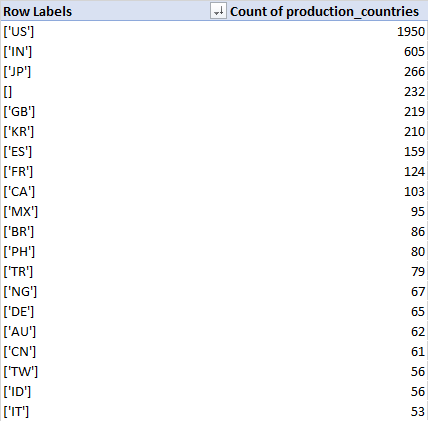

I am going to pick only the top 10 'US', 'IN', 'JP', 'GB', 'KR', 'ES', 'FR', 'CA', 'MX', 'BR'

In [ ]:
#df['US_prod'] = df['production_countries'].str.contains('US').any()
df['US_prod'] = df["production_countries"].str.find('US')

In [ ]:
df['IN_prod'] = df['production_countries'].str.find('IN')
df['JP_prod'] = df['production_countries'].str.find('JP')
df['GB_prod'] = df['production_countries'].str.find('GB')
df['KR_prod'] = df['production_countries'].str.find('KR')
df['ES_prod'] = df['production_countries'].str.find('ES')
df['FR_prod'] = df['production_countries'].str.find('FR')
df['CA_prod'] = df['production_countries'].str.find('CA')
df['MX_prod'] = df['production_countries'].str.find('MX')
df['BR_prod'] = df['production_countries'].str.find('BR')

In [ ]:
df['action'] = df["genres"].str.find('action')
df['thriller'] = df["genres"].str.find('thriller')
df['scifi'] = df["genres"].str.find('scifi')
df['horror'] = df["genres"].str.find('horror')
df['animation'] = df["genres"].str.find('animation')
df['fantasy'] = df["genres"].str.find('fantasy')
df['romance'] = df["genres"].str.find('romance')
df['family'] = df["genres"].str.find('family')
df['european'] = df["genres"].str.find('european')
df['crime'] = df["genres"].str.find('crime')
df['comedy'] = df["genres"].str.find('comedy')
df['sport'] = df["genres"].str.find('sport')
df['drama'] = df["genres"].str.find('drama')
df['documentation'] = df["genres"].str.find('documentation')
df['war'] = df["genres"].str.find('war')
df['music'] = df["genres"].str.find('music')
df['western'] = df["genres"].str.find('western')
df['history'] = df["genres"].str.find('history')
df['reality'] = df["genres"].str.find('reality')

In [ ]:
df['action'] = df['action'].gt(0)

df['action'] = df['action'].replace({
    True:1,
    False:0
})

In [ ]:
df['thriller'] = df['thriller'].gt(0)
df['scifi'] = df['scifi'].gt(0)
df['horror'] = df['horror'].gt(0)
df['animation'] = df['animation'].gt(0)
df['fantasy'] = df['fantasy'].gt(0)
df['romance'] = df['romance'].gt(0)
df['family'] = df['family'].gt(0)
df['european'] = df['european'].gt(0)
df['crime'] = df['crime'].gt(0)
df['comedy'] = df['comedy'].gt(0)
df['sport'] = df['sport'].gt(0)
df['drama'] = df['drama'].gt(0)
df['documentation'] = df['documentation'].gt(0)
df['war'] = df['war'].gt(0)
df['music'] = df['music'].gt(0)
df['western'] = df['western'].gt(0)
df['history'] = df['history'].gt(0)
df['reality'] = df['reality'].gt(0)

df['thriller'] = df['thriller'].replace({
    True:1,
    False:0
})
df['scifi'] = df['scifi'].replace({
    True:1,
    False:0
})
df['horror'] = df['horror'].replace({
    True:1,
    False:0
})
df['animation'] = df['animation'].replace({
    True:1,
    False:0
})
df['fantasy'] = df['fantasy'].replace({
    True:1,
    False:0
})
df['romance'] = df['romance'].replace({
    True:1,
    False:0
})
df['family'] = df['family'].replace({
    True:1,
    False:0
})
df['european'] = df['european'].replace({
    True:1,
    False:0
})
df['crime'] = df['crime'].replace({
    True:1,
    False:0
})
df['comedy'] = df['comedy'].replace({
    True:1,
    False:0
})
df['sport'] = df['sport'].replace({
    True:1,
    False:0
})
df['drama'] = df['drama'].replace({
    True:1,
    False:0
})
df['documentation'] = df['documentation'].replace({
    True:1,
    False:0
})
df['war'] = df['war'].replace({
    True:1,
    False:0
})
df['music'] = df['music'].replace({
    True:1,
    False:0
})
df['western'] = df['western'].replace({
    True:1,
    False:0
})
df['history'] = df['history'].replace({
    True:1,
    False:0
})
df['reality'] = df['reality'].replace({
    True:1,
    False:0
})

In [ ]:
df['action']

0       0
1       0
2       0
3       0
4       0
       ..
5801    0
5802    0
5803    0
5804    1
5805    0
Name: action, Length: 5806, dtype: int64

In [ ]:
df = df.drop(['null_production_countries'], axis =1)

In [ ]:
#df = df.drop(['IN_prod'], axis =1)
df['US_Prod_YN'] = df['US_prod'].gt(0)
df['US_Prod_YN'] = df['US_Prod_YN'].replace({
    True:1,
    False:0
})

In [ ]:
df['OldOrNew'] = df['release_year'].gt(2000)


In [ ]:
df['OldOrNew'] = df['OldOrNew'].replace({
    True:'New',
    False:'Old'
})

In [ ]:
df['IN_Prod_YN'] = df['IN_prod'].gt(0)
df['JP_Prod_YN'] = df['JP_prod'].gt(0)
df['GB_Prod_YN'] = df['GB_prod'].gt(0)
df['KR_Prod_YN'] = df['KR_prod'].gt(0)
df['ES_Prod_YN'] = df['ES_prod'].gt(0)
df['FR_Prod_YN'] = df['FR_prod'].gt(0)
df['CA_Prod_YN'] = df['CA_prod'].gt(0)
df['MX_Prod_YN'] = df['MX_prod'].gt(0)
df['BR_Prod_YN'] = df['BR_prod'].gt(0)

df['IN_Prod_YN'] = df['IN_Prod_YN'].replace({
    True:1,
    False:0
})
df['JP_Prod_YN'] = df['JP_Prod_YN'].replace({
    True:1,
    False:0
})
df['GB_Prod_YN'] = df['GB_Prod_YN'].replace({
    True:1,
    False:0
})
df['KR_Prod_YN'] = df['KR_Prod_YN'].replace({
    True:1,
    False:0
})
df['ES_Prod_YN'] = df['ES_Prod_YN'].replace({
    True:1,
    False:0
})
df['FR_Prod_YN'] = df['FR_Prod_YN'].replace({
    True:1,
    False:0
})
df['CA_Prod_YN'] = df['CA_Prod_YN'].replace({
    True:1,
    False:0
})
df['MX_Prod_YN'] = df['MX_Prod_YN'].replace({
    True:1,
    False:0
})
df['BR_Prod_YN'] = df['BR_Prod_YN'].replace({
    True:1,
    False:0
})

In [ ]:
data_df = df.copy()

In [ ]:
df.head(25)

title   type  release_year  \
0         Five Came Back: The Reference Films   SHOW          1945   
1                                 Taxi Driver  MOVIE          1976   
2             Monty Python and the Holy Grail  MOVIE          1975   
3                               Life of Brian  MOVIE          1979   
4                                The Exorcist  MOVIE          1973   
5                Monty Python's Flying Circus   SHOW          1969   
6                                 Dirty Harry  MOVIE          1971   
7                                My Fair Lady  MOVIE          1964   
8                             The Blue Lagoon  MOVIE          1980   
9                            Bonnie and Clyde  MOVIE          1967   
10                          The Professionals  MOVIE          1966   
11                       The Guns of Navarone  MOVIE          1961   
12  Lupin the Third: The Castle of Cagliostro  MOVIE          1979   
13             Richard Pryor: Live in Concert  MOVIE          1979   
14                            The Long Riders  MOVIE          1980   
15                            White Christmas  MOVIE          1954   
16                              Cairo Station  MOVIE          1958   
17                                  The Queen  MOVIE          1968   
18                           Hitler: A Career  MOVIE          1977   
19                                        FTA  MOVIE          1972   
20                     Saladin the Victorious  MOVIE          1963   
21                                  Singapore  MOVIE          1960   
22                                Dark Waters  MOVIE          1956   
23                           Alexandria… Why?  MOVIE          1979   
24                            Raya and Sakina  MOVIE          1953   

   age_certification  runtime  \
0              TV-MA       48   
1                  R      113   
2                 PG       91   
3                  R       94   
4                  R      133   
5              TV-14       30   
6                  R      102   
7                  G      170   
8                  R      104   
9                  R      110   
10             PG-13      117   
11              None      158   
12                PG      100   
13                 R       78   
14                 R       99   
15              None      115   
16              None       77   
17              None       68   
18                PG      150   
19                 R       97   
20              None      186   
21              None      158   
22              None      120   
23              None      133   
24              None      105   

                                               genres production_countries  \
0                                   ['documentation']               ['US']   
1                                  ['crime', 'drama']               ['US']   
2                               ['comedy', 'fantasy']               ['GB']   
3                                          ['comedy']               ['GB']   
4                                          ['horror']               ['US']   
5                              ['comedy', 'european']               ['GB']   
6                     ['thriller', 'crime', 'action']               ['US']   
7             ['drama', 'music', 'romance', 'family']               ['US']   
8                                ['romance', 'drama']               ['US']   
9                        ['drama', 'crime', 'action']               ['US']   
10                  ['western', 'action', 'european']               ['US']   
11                         ['war', 'action', 'drama']         ['US', 'GB']   
12  ['comedy', 'animation', 'action', 'fantasy', '...               ['JP']   
13                        ['comedy', 'documentation']               ['US']   
14                               ['western', 'crime']               ['US']   
15                     ['romance', 'comedy', 'music']               ['US']   
16                       ['drama',

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 5805 non-null   object
 1   type                  5806 non-null   object
 2   release_year          5806 non-null   int64 
 3   age_certification     5806 non-null   object
 4   runtime               5806 non-null   int64 
 5   genres                5806 non-null   object
 6   production_countries  5806 non-null   object
 7   seasons               5806 non-null   int64 
 8   imdb_id               5806 non-null   object
 9   imdb_score            5806 non-null   int64 
 10  imdb_votes            5806 non-null   int64 
 11  NoOfGenres            5806 non-null   int64 
 12  NoOfcountries         5806 non-null   int64 
 13  HowMuchOld            5806 non-null   int64 
 14  show_type             5806 non-null   int64 
 15  US_prod               5806 non-null   

In [ ]:
data_df = data_df.drop(['US_prod'], axis =1)
data_df = data_df.drop(['IN_prod'], axis =1)
data_df = data_df.drop(['JP_prod'], axis =1)
data_df = data_df.drop(['GB_prod'], axis =1)
data_df = data_df.drop(['KR_prod'], axis =1)
data_df = data_df.drop(['ES_prod'], axis =1)
data_df = data_df.drop(['FR_prod'], axis =1)
data_df = data_df.drop(['CA_prod'], axis =1)
data_df = data_df.drop(['MX_prod'], axis =1)
data_df = data_df.drop(['BR_prod'], axis =1)

In [ ]:
data_df = data_df.drop(['imdb_id'], axis =1)

In [ ]:
data_df = data_df.drop(['title'], axis =1)

In [ ]:
data_df = data_df.drop(['type'], axis =1)

In [ ]:
data_df = data_df.drop(['type'], axis =1)

In [ ]:
data_df = data_df.drop(['genres'], axis =1)

unique genres found are these:
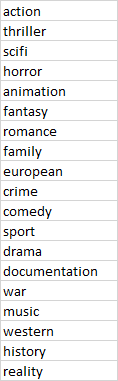

In [ ]:
data_df.head(20)

release_year age_certification  runtime  \
0           1945             TV-MA       48   
1           1976                 R      113   
2           1975                PG       91   
3           1979                 R       94   
4           1973                 R      133   
5           1969             TV-14       30   
6           1971                 R      102   
7           1964                 G      170   
8           1980                 R      104   
9           1967                 R      110   
10          1966             PG-13      117   
11          1961              None      158   
12          1979                PG      100   
13          1979                 R       78   
14          1980                 R       99   
15          1954              None      115   
16          1958              None       77   
17          1968              None       68   
18          1977                PG      150   
19          1972                 R       97   

                                               genres  seasons  imdb_score  \
0                                   ['documentation']        1           0   
1                                  ['crime', 'drama']        0           8   
2                               ['comedy', 'fantasy']        0           8   
3                                          ['comedy']        0           8   
4                                          ['horror']        0           8   
5                              ['comedy', 'european']        4           8   
6                     ['thriller', 'crime', 'action']        0           7   
7             ['drama', 'music', 'romance', 'family']        0           7   
8                                ['romance', 'drama']        0           5   
9                        ['drama', 'crime', 'action']        0           7   
10                  ['western', 'action', 'european']        0           7   
11                         ['war', 'action', 'drama']        0           7   
12  ['comedy', 'animation', 'action', 'fantasy', '...        0           7   
13                        ['comedy', 'documentation']        0           8   
14                               ['western', 'crime']        0           6   
15                     ['romance', 'comedy', 'music']        0           7   
16                       ['drama', 'crime', 'comedy']        0           7   
17                                  ['documentation']        0           7   
18           ['documentation', 'history', 'european']        0           7   
19               ['comedy', 'documentation', 'music']        0           6   

    imdb_votes  NoOfGenres  NoOfcountries  HowMuchOld  ...  crime  comedy  \
0            0           1              1          79  ...      0       0   
1       795222           2              1          48  ...      1       0   
2       530877           2              1          49  ...      0       1   
3       392419           1              1          45  ...      0       1   
4       391942           1              1          51  ...      0       0   
5        72895           2              1          55  ...      0       1   
6       153463           3              1          53  ...      1       0   
7        94121           4              1          60  ...      0       0   
8        69053           2              1          44  ...      0       0   
9       111189           3              1          57  ...      1       0   
10       16168           3              1          58  ...      0       0   
11       50150           3              2          63  ...      0       0   
12       30277           5              1          45  ...      0       1   
13        5141           2              1          45  ...      0       1   
14       11329           2              1          44  ...      1       0   
15       42373           3              1          70  ...      0       1   
16        4385           3              1          66  ...      1   

In [ ]:
data_df.nunique()

release_year           67
age_certification      12
runtime               205
genres               1626
seasons                24
imdb_score             10
imdb_votes           3832
NoOfGenres              9
NoOfcountries           7
HowMuchOld             67
show_type               2
US_Prod_YN              2
IN_Prod_YN              2
JP_Prod_YN              2
GB_Prod_YN              2
KR_Prod_YN              2
ES_Prod_YN              2
FR_Prod_YN              2
CA_Prod_YN              2
MX_Prod_YN              2
BR_Prod_YN              2
OldOrNew                2
action                  2
thriller                2
scifi                   2
horror                  2
animation               2
fantasy                 2
romance                 2
family                  2
european                2
crime                   2
comedy                  2
sport                   2
drama                   2
documentation           2
war                     2
music                   2
western     

In [ ]:
data_df.isnull()

release_year  age_certification  runtime  seasons  imdb_score  \
0            False              False    False    False       False   
1            False              False    False    False       False   
2            False              False    False    False       False   
3            False              False    False    False       False   
4            False              False    False    False       False   
...            ...                ...      ...      ...         ...   
5801         False              False    False    False       False   
5802         False              False    False    False       False   
5803         False              False    False    False       False   
5804         False              False    False    False       False   
5805         False              False    False    False       False   

      imdb_votes  NoOfGenres  NoOfcountries  HowMuchOld  show_type  ...  \
0          False       False          False       False      False  ...   
1          False       False          False       False      False  ...   
2          False       False          False       False      False  ...   
3          False       False          False       False      False  ...   
4          False       False          False       False      False  ...   
...          ...         ...            ...         ...        ...  ...   
5801       False       False          False       False      False  ...   
5802       False       False          False       False      False  ...   
5803       False       False          False       False      False  ...   
5804       False       False          False       False      False  ...   
5805       False       False          False       False      False  ...   

      crime  comedy  sport  drama  documentation    war  music  western  \
0     False   False  False  False          False  False  False    False   
1     False   False  False  False          False  False  False    False   
2     False   False  False  False          False  False  False    False   
3     False   False  False  False          False  False  False    False   
4     False   False  False  False          False  False  False    False   
...     ...     ...    ...    ...            ...    ...    ...      ...   
5801  False   False  False  False          False  False  False    False   
5802  False   False  False  False          False  False  False    False   
5803  False   False  False  False          False  False  False    False   
5804  False   False  False  False          False  False  False    False   
5805  False   False  False  False          False  False  False    False   

      history  reality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
5801    False    False  
5802    False    False  
5803    False    False  
5804    False    False  
5805    False    False  

[5806 rows x 40 columns]

In [ ]:
for column_name in data_df.columns:
    print("Unique values in column {} are: {}".format(column_name, data_df[column_name].unique()))

Unique values in column release_year are: [1945 1976 1975 1979 1973 1969 1971 1964 1980 1967 1966 1961 1954 1958
 1968 1977 1972 1963 1960 1956 1953 1974 1959 1962 1978 1986 1989 1984
 1990 1987 1983 1982 1981 1988 1985 1995 2000 1997 1994 1996 1999 1998
 1993 1992 1991 2008 2010 2004 2005 2003 2009 2007 2006 2001 2002 2012
 2011 2014 2013 2015 2016 2017 2018 2019 2020 2022 2021]
Unique values in column age_certification are: ['TV-MA' 'R' 'PG' 'TV-14' 'G' 'PG-13' 'None' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']
Unique values in column runtime are: [ 48 113  91  94 133  30 102 170 104 110 117 158 100  78  99 115  77  68
 150  97 186 120 105 235 161  43 124 152 230 217 251 162  74  93 153 142
 138 163 135 141 131  24  89 229  96 116  90  51  10 127 103  23  84  26
  15  50  87 144 174  72 134 172 148 194 166 160 108  81 159 129 151 107
  44  22  92 169  25  47  40 106  46 119 126 130 136 123 165 112  19 128
 118 101  88  28  95 114  21  61  75  63 185   9 171 156 177  49 175 155
 206 145 1

In [ ]:
data_df.isnull().sum()*100/data_df.isnull().count()

release_year         0.0
age_certification    0.0
runtime              0.0
seasons              0.0
imdb_score           0.0
imdb_votes           0.0
NoOfGenres           0.0
NoOfcountries        0.0
HowMuchOld           0.0
show_type            0.0
US_Prod_YN           0.0
IN_Prod_YN           0.0
JP_Prod_YN           0.0
GB_Prod_YN           0.0
KR_Prod_YN           0.0
ES_Prod_YN           0.0
FR_Prod_YN           0.0
CA_Prod_YN           0.0
MX_Prod_YN           0.0
BR_Prod_YN           0.0
OldOrNew             0.0
action               0.0
thriller             0.0
scifi                0.0
horror               0.0
animation            0.0
fantasy              0.0
romance              0.0
family               0.0
european             0.0
crime                0.0
comedy               0.0
sport                0.0
drama                0.0
documentation        0.0
war                  0.0
music                0.0
western              0.0
history              0.0
reality              0.0


In [ ]:
data_df['OldOrNew'] = data_df['OldOrNew'].replace({
    'New': 1,
    'Old': 0
})

In [ ]:
data_df['age_certification'] = data_df['age_certification'].replace({
    'TV-MA': 1,
    'R': 2,
    'PG': 3,
    'TV-14' : 4,
    'G' : 5,
    'PG-13' : 6,
    'None' : 0,
    'TV-PG' : 7,
    'TV-Y' : 8,
    'TV-G' : 9,
    'TV-Y7': 10,
    'NC-17': 11
})



In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   release_year       5806 non-null   int64
 1   age_certification  5806 non-null   int64
 2   runtime            5806 non-null   int64
 3   seasons            5806 non-null   int64
 4   imdb_score         5806 non-null   int64
 5   imdb_votes         5806 non-null   int64
 6   NoOfGenres         5806 non-null   int64
 7   NoOfcountries      5806 non-null   int64
 8   HowMuchOld         5806 non-null   int64
 9   show_type          5806 non-null   int64
 10  US_Prod_YN         5806 non-null   int64
 11  IN_Prod_YN         5806 non-null   int64
 12  JP_Prod_YN         5806 non-null   int64
 13  GB_Prod_YN         5806 non-null   int64
 14  KR_Prod_YN         5806 non-null   int64
 15  ES_Prod_YN         5806 non-null   int64
 16  FR_Prod_YN         5806 non-null   int64
 17  CA_Prod_YN    

In [ ]:
df.dropna(subset='age_certification', inplace=True)
df.dropna(subset='seasons', inplace=True)
df.dropna(subset='imdb_score', inplace=True)
df.dropna(subset='imdb_votes', inplace=True)

In [ ]:
for column_name in data_df.columns:
    print("Unique values in column {} are: {}".format(column_name, data_df[column_name].unique()))

Unique values in column release_year are: [1945 1976 1975 1979 1973 1969 1971 1964 1980 1967 1966 1961 1954 1958
 1968 1977 1972 1963 1960 1956 1953 1974 1959 1962 1978 1986 1989 1984
 1990 1987 1983 1982 1981 1988 1985 1995 2000 1997 1994 1996 1999 1998
 1993 1992 1991 2008 2010 2004 2005 2003 2009 2007 2006 2001 2002 2012
 2011 2014 2013 2015 2016 2017 2018 2019 2020 2022 2021]
Unique values in column age_certification are: ['TV-MA' 'R' 'PG' 'TV-14' 'G' 'PG-13' 'None' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']
Unique values in column runtime are: [ 48 113  91  94 133  30 102 170 104 110 117 158 100  78  99 115  77  68
 150  97 186 120 105 235 161  43 124 152 230 217 251 162  74  93 153 142
 138 163 135 141 131  24  89 229  96 116  90  51  10 127 103  23  84  26
  15  50  87 144 174  72 134 172 148 194 166 160 108  81 159 129 151 107
  44  22  92 169  25  47  40 106  46 119 126 130 136 123 165 112  19 128
 118 101  88  28  95 114  21  61  75  63 185   9 171 156 177  49 175 155
 206 145 1

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   release_year       5806 non-null   int64
 1   age_certification  5806 non-null   int64
 2   runtime            5806 non-null   int64
 3   seasons            5806 non-null   int64
 4   imdb_score         5806 non-null   int64
 5   imdb_votes         5806 non-null   int64
 6   NoOfGenres         5806 non-null   int64
 7   NoOfcountries      5806 non-null   int64
 8   HowMuchOld         5806 non-null   int64
 9   show_type          5806 non-null   int64
 10  US_Prod_YN         5806 non-null   int64
 11  IN_Prod_YN         5806 non-null   int64
 12  JP_Prod_YN         5806 non-null   int64
 13  GB_Prod_YN         5806 non-null   int64
 14  KR_Prod_YN         5806 non-null   int64
 15  ES_Prod_YN         5806 non-null   int64
 16  FR_Prod_YN         5806 non-null   int64
 17  CA_Prod_YN    

In [ ]:
data_df.isnull().sum()*100/data_df.isnull().count()

release_year         0.0
age_certification    0.0
runtime              0.0
seasons              0.0
imdb_score           0.0
imdb_votes           0.0
NoOfGenres           0.0
NoOfcountries        0.0
HowMuchOld           0.0
show_type            0.0
US_Prod_YN           0.0
IN_Prod_YN           0.0
JP_Prod_YN           0.0
GB_Prod_YN           0.0
KR_Prod_YN           0.0
ES_Prod_YN           0.0
FR_Prod_YN           0.0
CA_Prod_YN           0.0
MX_Prod_YN           0.0
BR_Prod_YN           0.0
OldOrNew             0.0
action               0.0
thriller             0.0
scifi                0.0
horror               0.0
animation            0.0
fantasy              0.0
romance              0.0
family               0.0
european             0.0
crime                0.0
comedy               0.0
sport                0.0
drama                0.0
documentation        0.0
war                  0.0
music                0.0
western              0.0
history              0.0
reality              0.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_year       5806 non-null   int64 
 1   age_certification  5806 non-null   object
 2   runtime            5806 non-null   int64 
 3   seasons            5806 non-null   int64 
 4   imdb_score         5806 non-null   int64 
 5   imdb_votes         5806 non-null   int64 
 6   NoOfGenres         5806 non-null   int64 
 7   NoOfcountries      5806 non-null   int64 
 8   HowMuchOld         5806 non-null   int64 
 9   show_type          5806 non-null   int64 
 10  US_Prod_YN         5806 non-null   int64 
 11  IN_Prod_YN         5806 non-null   int64 
 12  JP_Prod_YN         5806 non-null   int64 
 13  GB_Prod_YN         5806 non-null   int64 
 14  KR_Prod_YN         5806 non-null   int64 
 15  ES_Prod_YN         5806 non-null   int64 
 16  FR_Prod_YN         5806 non-null   int64 


In [ ]:
for column_name in data_df.columns:
    print("Unique values in column {} are: {}".format(column_name, data_df[column_name].unique()))

Unique values in column release_year are: [1945 1976 1975 1979 1973 1969 1971 1964 1980 1967 1966 1961 1954 1958
 1968 1977 1972 1963 1960 1956 1953 1974 1959 1962 1978 1986 1989 1984
 1990 1987 1983 1982 1981 1988 1985 1995 2000 1997 1994 1996 1999 1998
 1993 1992 1991 2008 2010 2004 2005 2003 2009 2007 2006 2001 2002 2012
 2011 2014 2013 2015 2016 2017 2018 2019 2020 2022 2021]
Unique values in column age_certification are: ['TV-MA' 'R' 'PG' 'TV-14' 'G' 'PG-13' 'None' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7'
 'NC-17']
Unique values in column runtime are: [ 48 113  91  94 133  30 102 170 104 110 117 158 100  78  99 115  77  68
 150  97 186 120 105 235 161  43 124 152 230 217 251 162  74  93 153 142
 138 163 135 141 131  24  89 229  96 116  90  51  10 127 103  23  84  26
  15  50  87 144 174  72 134 172 148 194 166 160 108  81 159 129 151 107
  44  22  92 169  25  47  40 106  46 119 126 130 136 123 165 112  19 128
 118 101  88  28  95 114  21  61  75  63 185   9 171 156 177  49 175 155
 206 145 1

In [ ]:
#X = encode_df

y = data_df['age_certification']
X = data_df.drop(['age_certification'], axis =1)
#X = data_df['ID', 'Income', 'Kidhome', 'Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds','Age','NoOfCampaignsAccepted']

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=12, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1.69 s ± 618 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

pca.shape[0]

5806

In [ ]:
y_pred

array([9, 9, 9, ..., 7, 0, 2], dtype=int32)

In [ ]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=12,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)



86.8 ms ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   release_year   5806 non-null   int64
 1   runtime        5806 non-null   int64
 2   seasons        5806 non-null   int64
 3   imdb_score     5806 non-null   int64
 4   imdb_votes     5806 non-null   int64
 5   NoOfGenres     5806 non-null   int64
 6   NoOfcountries  5806 non-null   int64
 7   HowMuchOld     5806 non-null   int64
 8   show_type      5806 non-null   int64
 9   US_Prod_YN     5806 non-null   int64
 10  IN_Prod_YN     5806 non-null   int64
 11  JP_Prod_YN     5806 non-null   int64
 12  GB_Prod_YN     5806 non-null   int64
 13  KR_Prod_YN     5806 non-null   int64
 14  ES_Prod_YN     5806 non-null   int64
 15  FR_Prod_YN     5806 non-null   int64
 16  CA_Prod_YN     5806 non-null   int64
 17  MX_Prod_YN     5806 non-null   int64
 18  BR_Prod_YN     5806 non-null   int64
 19  OldOrN

In [ ]:
print(X.shape)
print(y.shape)

(5806, 39)
(5806,)


**K means**

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=12, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1.71 s ± 753 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)



**Evaluating Clusters**

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Splitting the data into four equally sized samples. First, break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# DataFrame to store features and predicted cluster memberships
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time that you go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. You use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the DataFrame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):

    # Put the features into `ypred`
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]

    # Generate cluster predictions and store them for clusters 2-4.
    for nclust in range(2, 12):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

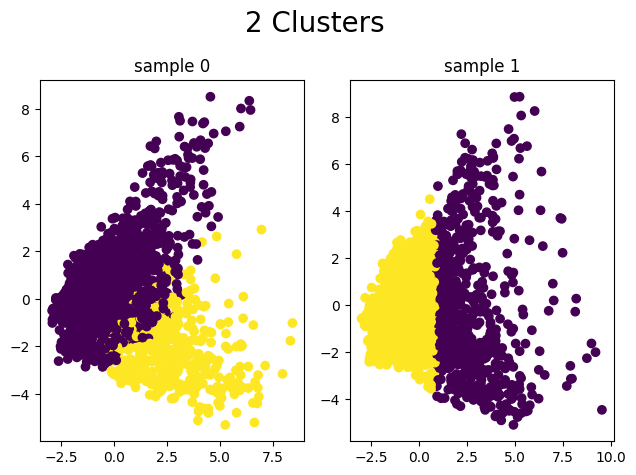

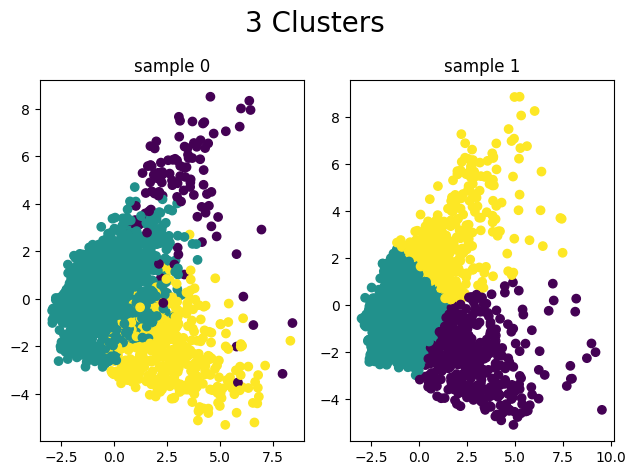

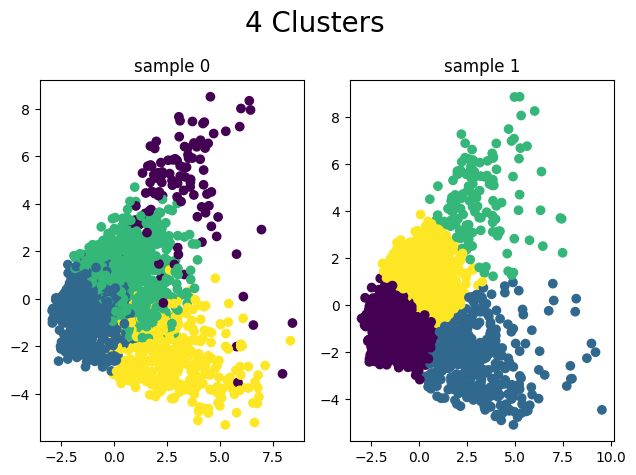

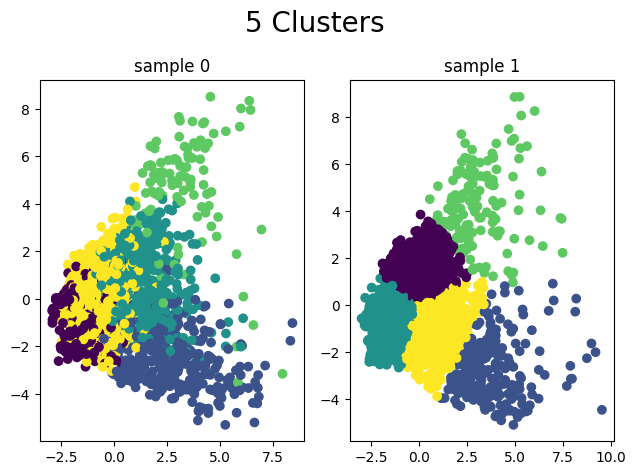

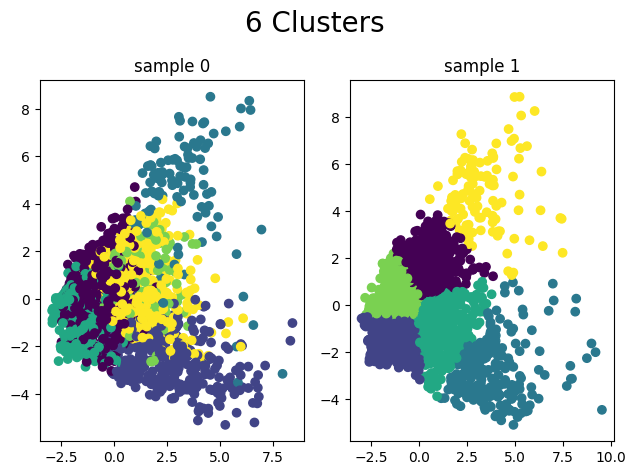

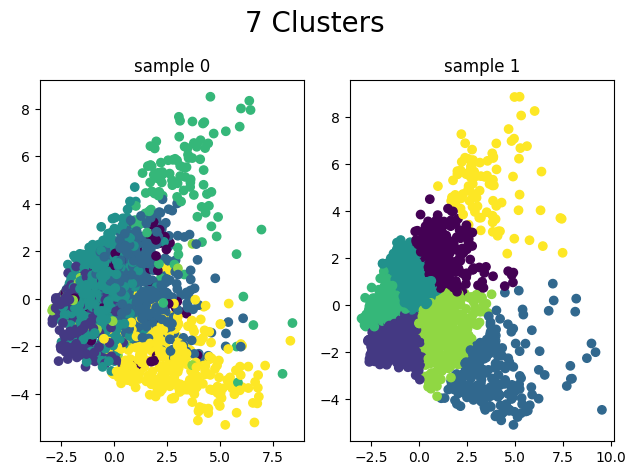

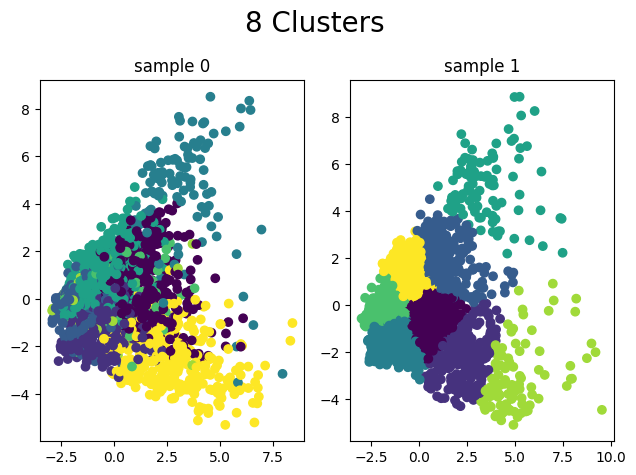

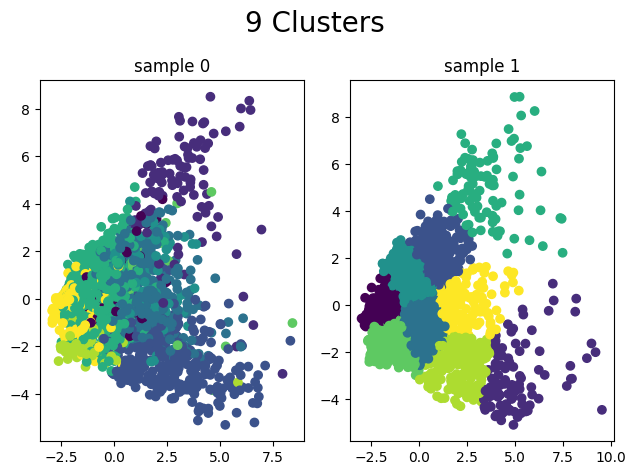

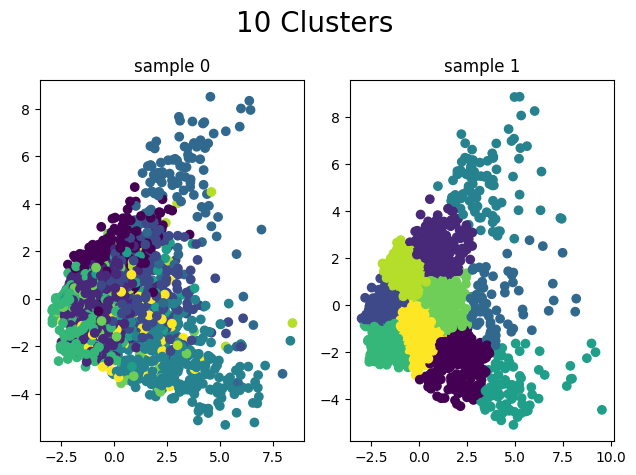

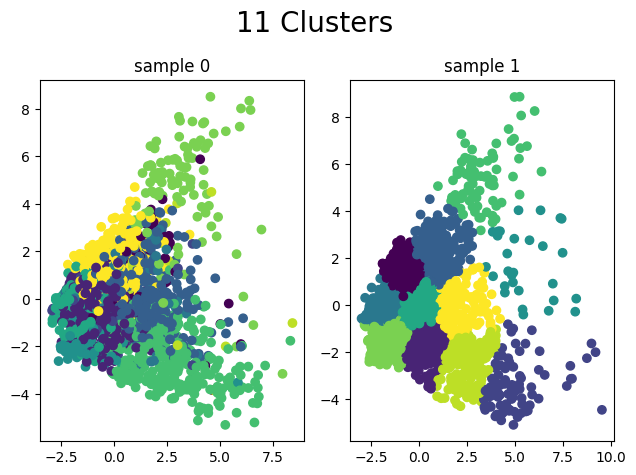

In [ ]:
# For each  number of clusters, plot the clusters using the
# PCA features for each sample
for cluster in range(2, 12):

    # Make a grid of subplots
    f, axarr = plt.subplots(1, 2)

    # Make a plot for each sample
    for i in range(2):

        # PCA-created features
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]

        # Cluster assignments
        c = ypred['clust{}_sample{}'.format(cluster, i)]

        # Assign the subplot to its place on the grid
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))

    # Space out the plots so that the headings don't overlap axis values
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [ ]:
# Get predicted clusters
full_pred = KMeans(n_clusters=12, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred)

col_0               0   1   2    3   4    5   6    7    8    9    10   11
age_certification                                                        
0                  180  40  89  119  68  329  82  978  120  100  403  102
1                  136  30  55  326  32   18  51    1   31    6  110   45
2                  218  30   2    1  10   24   4  165   28   45   36   12
3                    4   2  55    0   1   60   1   70    5   19   23    6
4                   41  13  72  226   5    2  47    0    3    3   50    8
5                    1   1  21    0   0   35   0   50    3   11    7    2
6                   67  17  34    1   3   65   3  171   14   20   37    8
7                    5   1  34  100   1    1   9    0    1   11   23    0
8                    0   0  59   29   0    0   5    0    5    4    0    3
9                    0   0  23   33   0    0   2    0    4    5    7    2
10                   1   0  79   16   3    0   5    0    3    3    2    0
11                   3   1   2    0   0    2   1    1    1    1    2    0

data_df['age_certification'] = data_df['age_certification'].replace({
    'TV-MA': 1,
    'R': 2,
    'PG': 3,
    'TV-14' : 4,
    'G' : 5,
    'PG-13' : 6,
    'None' : 0,
    'TV-PG' : 7,
    'TV-Y' : 8,
    'TV-G' : 9,
    'TV-Y7': 10,
    'NC-17': 11
})


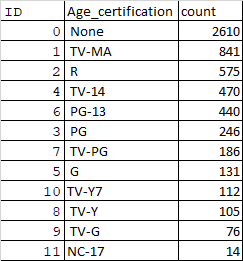

Output from above prediction can be compared with the actual raw data:
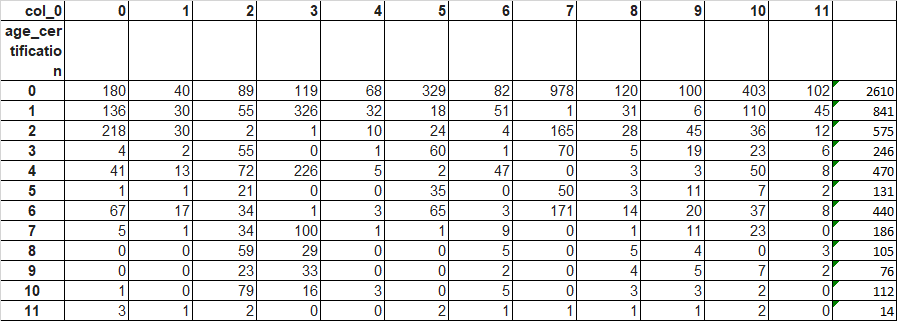





In [ ]:
def rand_index_score(ground_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(predictions), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(ground_truths), 2).sum()
    A = np.c_[(ground_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(ground_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
rand_index_score(y, full_pred)

0.7186953530207101

In [ ]:
metrics.adjusted_rand_score(y, full_pred)

0.10936800041491924

In [ ]:
labels = KMeans(n_clusters=12, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.11082969191026788


**Hierarchical clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=12)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)



In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: -0.004412709790177011
The silhouette score of the Agglomerative Clustering solution: -0.06655046849810355


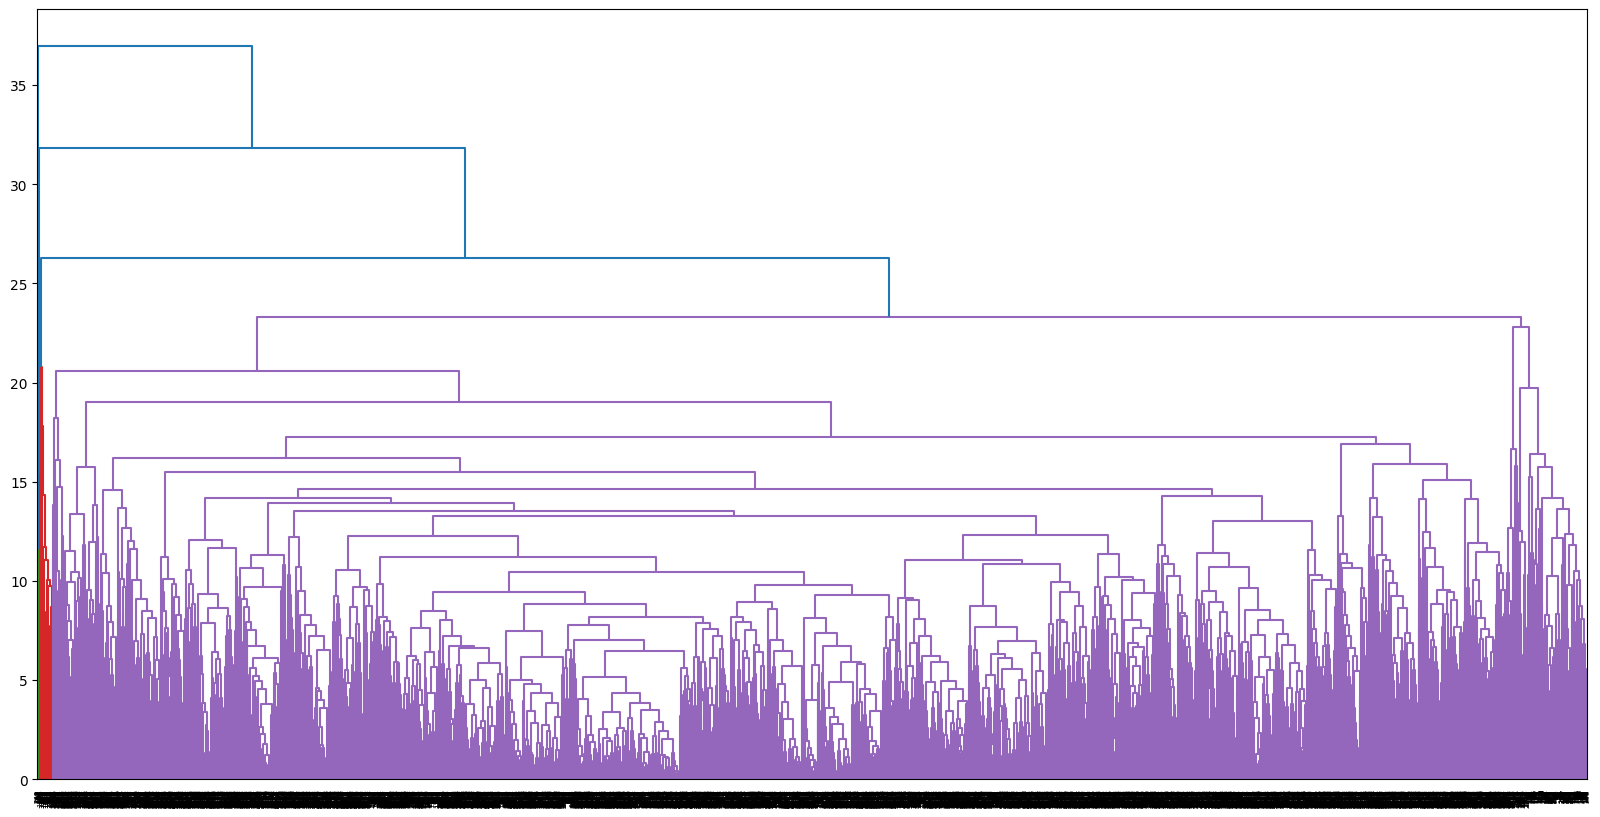

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

**The DBSCAN approach to clustering**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=12)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

In [ ]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: -0.06949370273888157


In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.1687081988983758


**Clustering with Gaussian mixture models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=12, random_state=123)

clusters = gmm_cluster.fit_predict(X_std)

In [ ]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.0526895992853243
The silhouette score of the GMM solution: 0.04805224058221072


In [ ]:
# Relabeling
clusters = np.array([2 if x == 1 else 1 if x==2 else x for x in clusters])

pd.crosstab(y,clusters)

col_0               0    1    2   3    4   5    6   7    8    9    10   11
age_certification                                                         
0                  829   92  443  62  262   7  114   9  101  104  260  327
1                  168  219    0  56  218  38   48   6    6   16   46   20
2                   76   47  236  32   40   0   16  16   45   11   34   22
3                   36   29   45   4   19   0    6   1   19    6   22   59
4                  122  113    0  22  112  15    8   3    6    9   58    2
5                   32    6   25   1    6   0    2   0   11    5    7   36
6                   56   40  123  17   38   0   10   6   20   12   54   64
7                   52   35    0   3   64   6    0   0   12    3   10    1
8                   56   39    0   0    0   1    3   0    5    0    0    1
9                   25   23    0   0   15   2    2   0    5    3    1    0
10                  36   55    0   0    3   6    2   3    4    1    2    0
11                   2    3    3   2    0   0    0   0    1    0    1    2

In [ ]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # Squaring emphasizes differences

**Dimensionality reduction with PCA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
np.random.seed(123)

indices = np.random.choice(len(data_df), 10000)


In [ ]:
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)

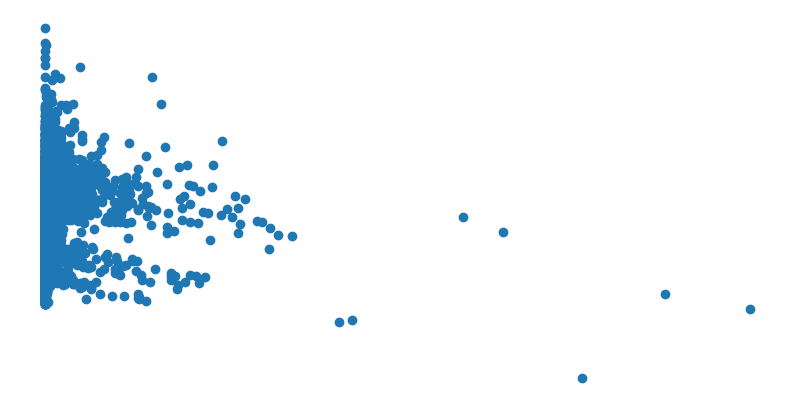

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**Dimensionality reduction with t-SNE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5806 samples in 0.001s...
[t-SNE] Computed neighbors for 5806 samples in 0.406s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5806
[t-SNE] Computed conditional probabilities for sample 2000 / 5806
[t-SNE] Computed conditional probabilities for sample 3000 / 5806
[t-SNE] Computed conditional probabilities for sample 4000 / 5806
[t-SNE] Computed conditional probabilities for sample 5000 / 5806
[t-SNE] Computed conditional probabilities for sample 5806 / 5806
[t-SNE] Mean sigma: 11.678381
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.101936
[t-SNE] KL divergence after 300 iterations: 1.481811
t-SNE done! Time elapsed: 20.124842166900635 seconds


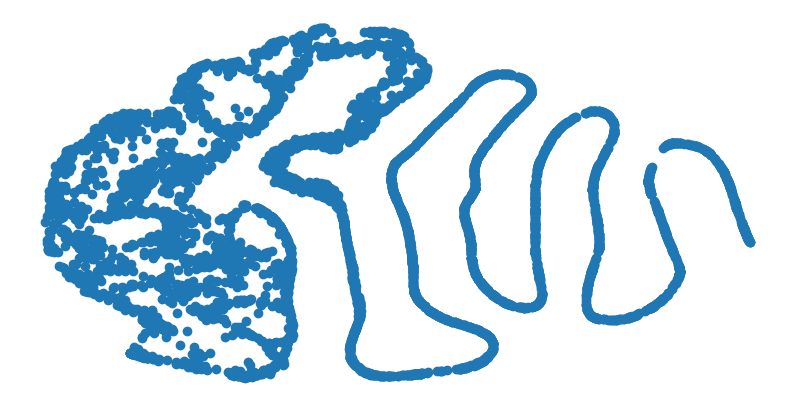

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**Dimensionality reduction with UMAP**

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2010a05e847e210fa55125e810f9c7689e6446bb98c222b41567a43876509d86
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=12,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 34.63172268867493 seconds


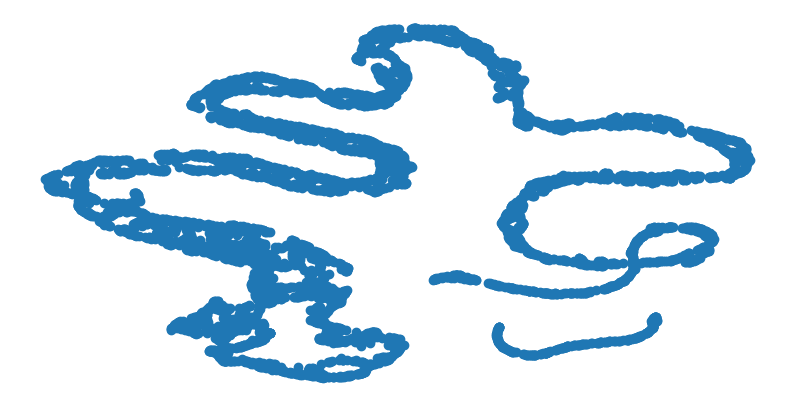

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

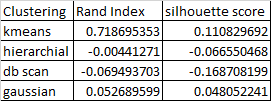

Comparing the RAND index and Silhouette scors in the clustering models, I find KMeans is the best. Because, the RAND index and Silhouette scores are high for KMeans.

Kmeans is the best in clustering

PCA is the best in Dimensionality reduction. because the groups are separated nicely compared to TSNE and UMAP.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   release_year       5806 non-null   int64
 1   age_certification  5806 non-null   int64
 2   runtime            5806 non-null   int64
 3   seasons            5806 non-null   int64
 4   imdb_score         5806 non-null   int64
 5   imdb_votes         5806 non-null   int64
 6   NoOfGenres         5806 non-null   int64
 7   NoOfcountries      5806 non-null   int64
 8   HowMuchOld         5806 non-null   int64
 9   show_type          5806 non-null   int64
 10  US_Prod_YN         5806 non-null   int64
 11  IN_Prod_YN         5806 non-null   int64
 12  JP_Prod_YN         5806 non-null   int64
 13  GB_Prod_YN         5806 non-null   int64
 14  KR_Prod_YN         5806 non-null   int64
 15  ES_Prod_YN         5806 non-null   int64
 16  FR_Prod_YN         5806 non-null   int64
 17  CA_Prod_YN    

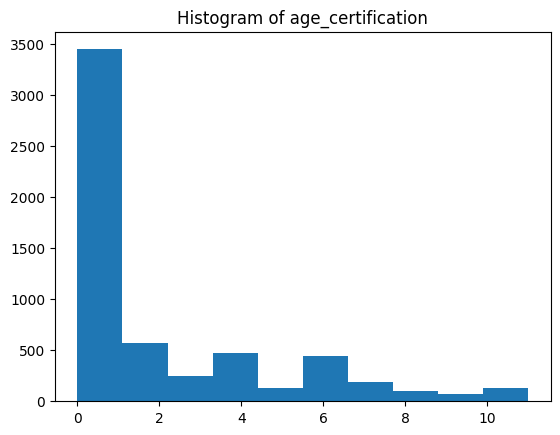

In [ ]:
plt.hist(data_df["age_certification"])
plt.title("Histogram of age_certification")
plt.show()

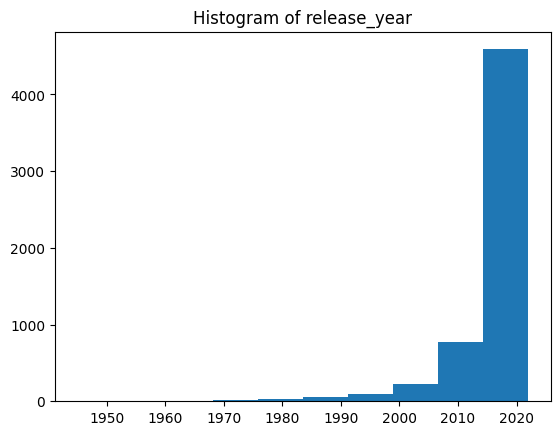

In [ ]:
plt.hist(data_df["release_year"])
plt.title("Histogram of release_year")
plt.show()

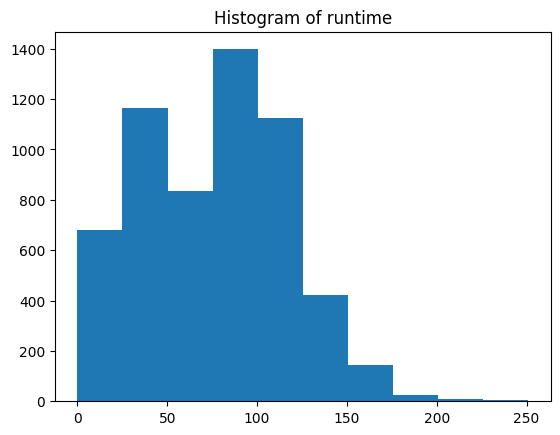

In [ ]:
plt.hist(data_df["runtime"])
plt.title("Histogram of runtime")
plt.show()

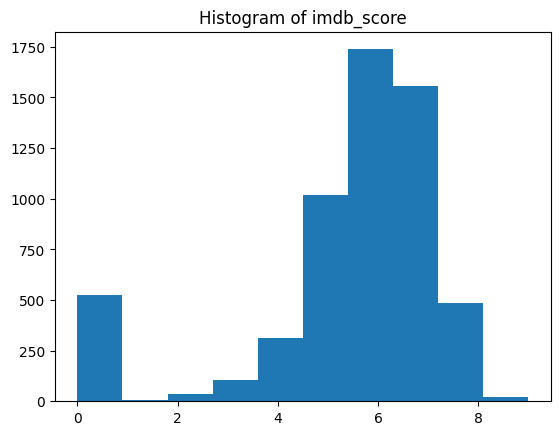

In [ ]:
plt.hist(data_df["imdb_score"])
plt.title("Histogram of imdb_score")
plt.show()

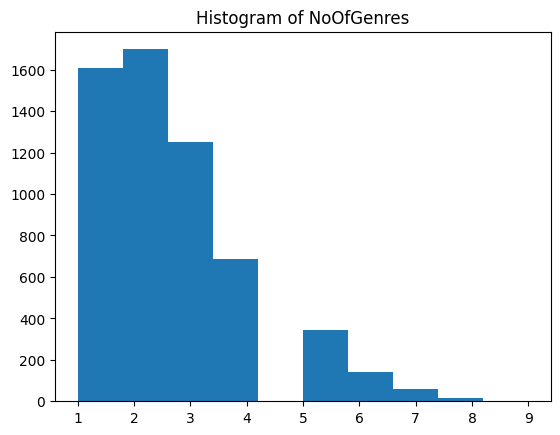

In [ ]:
plt.hist(data_df["NoOfGenres"])
plt.title("Histogram of NoOfGenres")
plt.show()

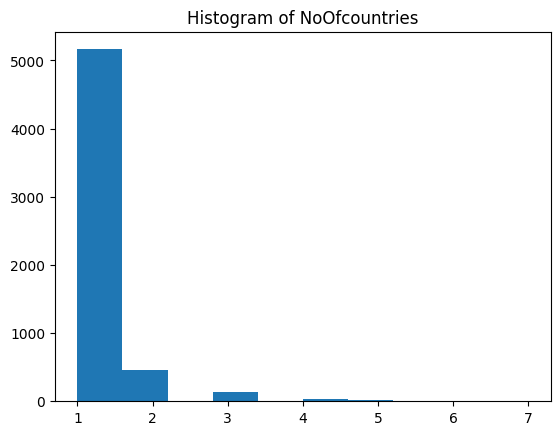

In [ ]:
plt.hist(data_df["NoOfcountries"])
plt.title("Histogram of NoOfcountries")
plt.show()

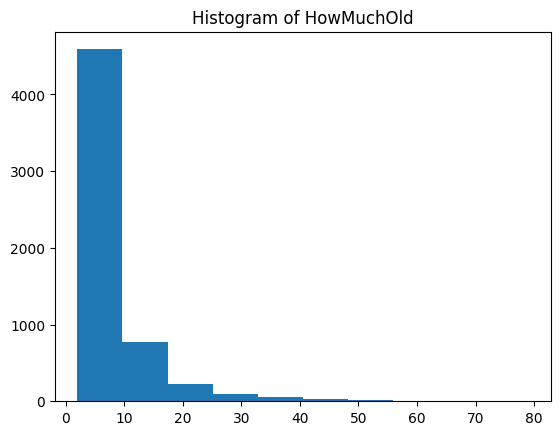

In [ ]:
plt.hist(data_df["HowMuchOld"])
plt.title("Histogram of HowMuchOld")
plt.show()

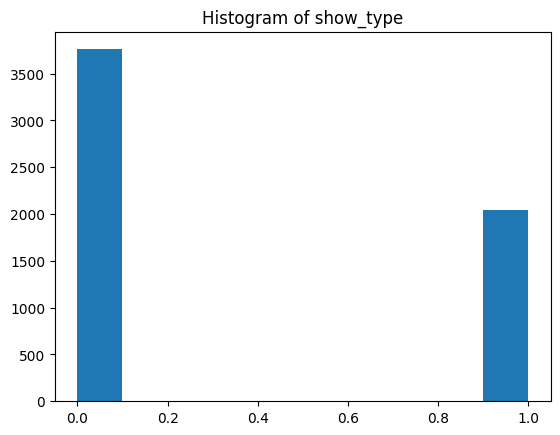

In [ ]:
plt.hist(data_df["show_type"])
plt.title("Histogram of show_type")
plt.show()

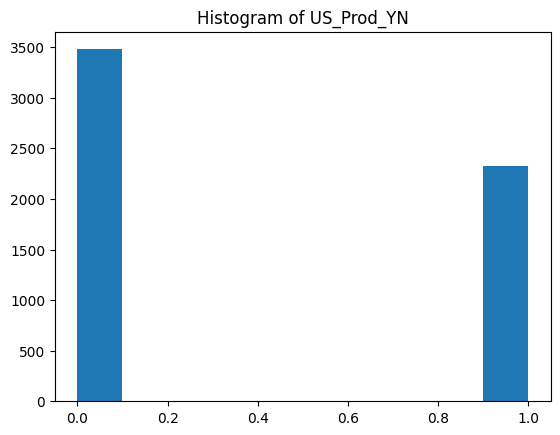

In [ ]:
plt.hist(data_df["US_Prod_YN"])
plt.title("Histogram of US_Prod_YN")
plt.show()

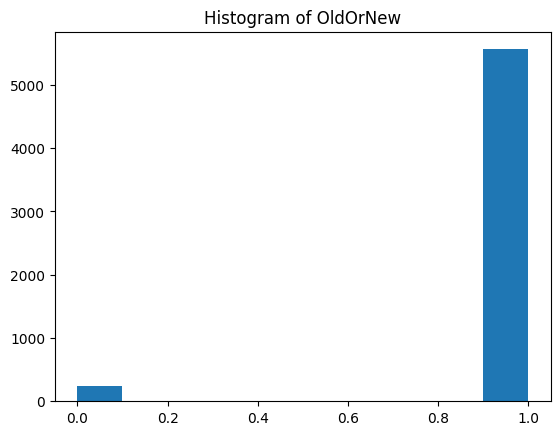

In [ ]:
plt.hist(data_df["OldOrNew"])
plt.title("Histogram of OldOrNew")
plt.show()

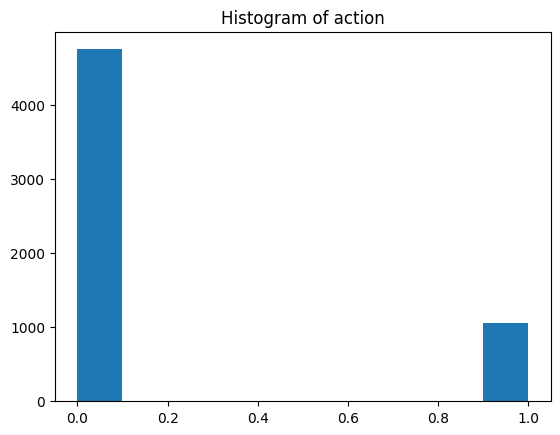

In [ ]:
plt.hist(data_df["action"])
plt.title("Histogram of action")
plt.show()

In [ ]:
# Get univariate statistics
data_df.describe()

release_year  age_certification      runtime      seasons   imdb_score  \
count   5806.000000        5806.000000  5806.000000  5806.000000  5806.000000   
mean    2016.013434           2.067516    77.643989     0.763520     5.536686   
std        7.324883           2.691600    39.474160     1.876199     2.085250   
min     1945.000000           0.000000     0.000000     0.000000     0.000000   
25%     2015.000000           0.000000    44.000000     0.000000     5.000000   
50%     2018.000000           1.000000    84.000000     0.000000     6.000000   
75%     2020.000000           4.000000   105.000000     1.000000     7.000000   
max     2022.000000          11.000000   251.000000    42.000000     9.000000   

         imdb_votes   NoOfGenres  NoOfcountries   HowMuchOld    show_type  \
count  5.806000e+03  5806.000000    5806.000000  5806.000000  5806.000000   
mean   2.123419e+04     2.519118       1.158457     7.986566     0.352566   
std    8.326811e+04     1.410517       0.525036     7.324883     0.477810   
min    0.000000e+00     1.000000       1.000000     2.000000     0.000000   
25%    2.850000e+02     1.000000       1.000000     4.000000     0.000000   
50%    1.705000e+03     2.000000       1.000000     6.000000     0.000000   
75%    8.216500e+03     3.000000       1.000000     9.000000     1.000000   
max    2.268288e+06     9.000000       7.000000    79.000000     1.000000   

       ...        crime       comedy        sport        drama  documentation  \
count  ...  5806.000000  5806.000000  5806.000000  5806.000000    5806.000000   
mean   ...     0.153462     0.390803     0.028591     0.499656       0.156734   
std    ...     0.360463     0.487972     0.166669     0.500043       0.363581   
min    ...     0.000000     0.000000     0.000000     0.000000       0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000       0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000       0.000000   
75%    ...     0.000000     1.000000     0.000000     1.000000       0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000       1.000000   

               war        music      western      history      reality  
count  5806.000000  5806.000000  5806.000000  5806.000000  5806.000000  
mean      0.025663     0.040992     0.007578     0.040131     0.038409  
std       0.158142     0.198289     0.086731     0.196283     0.192197  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 40 columns]

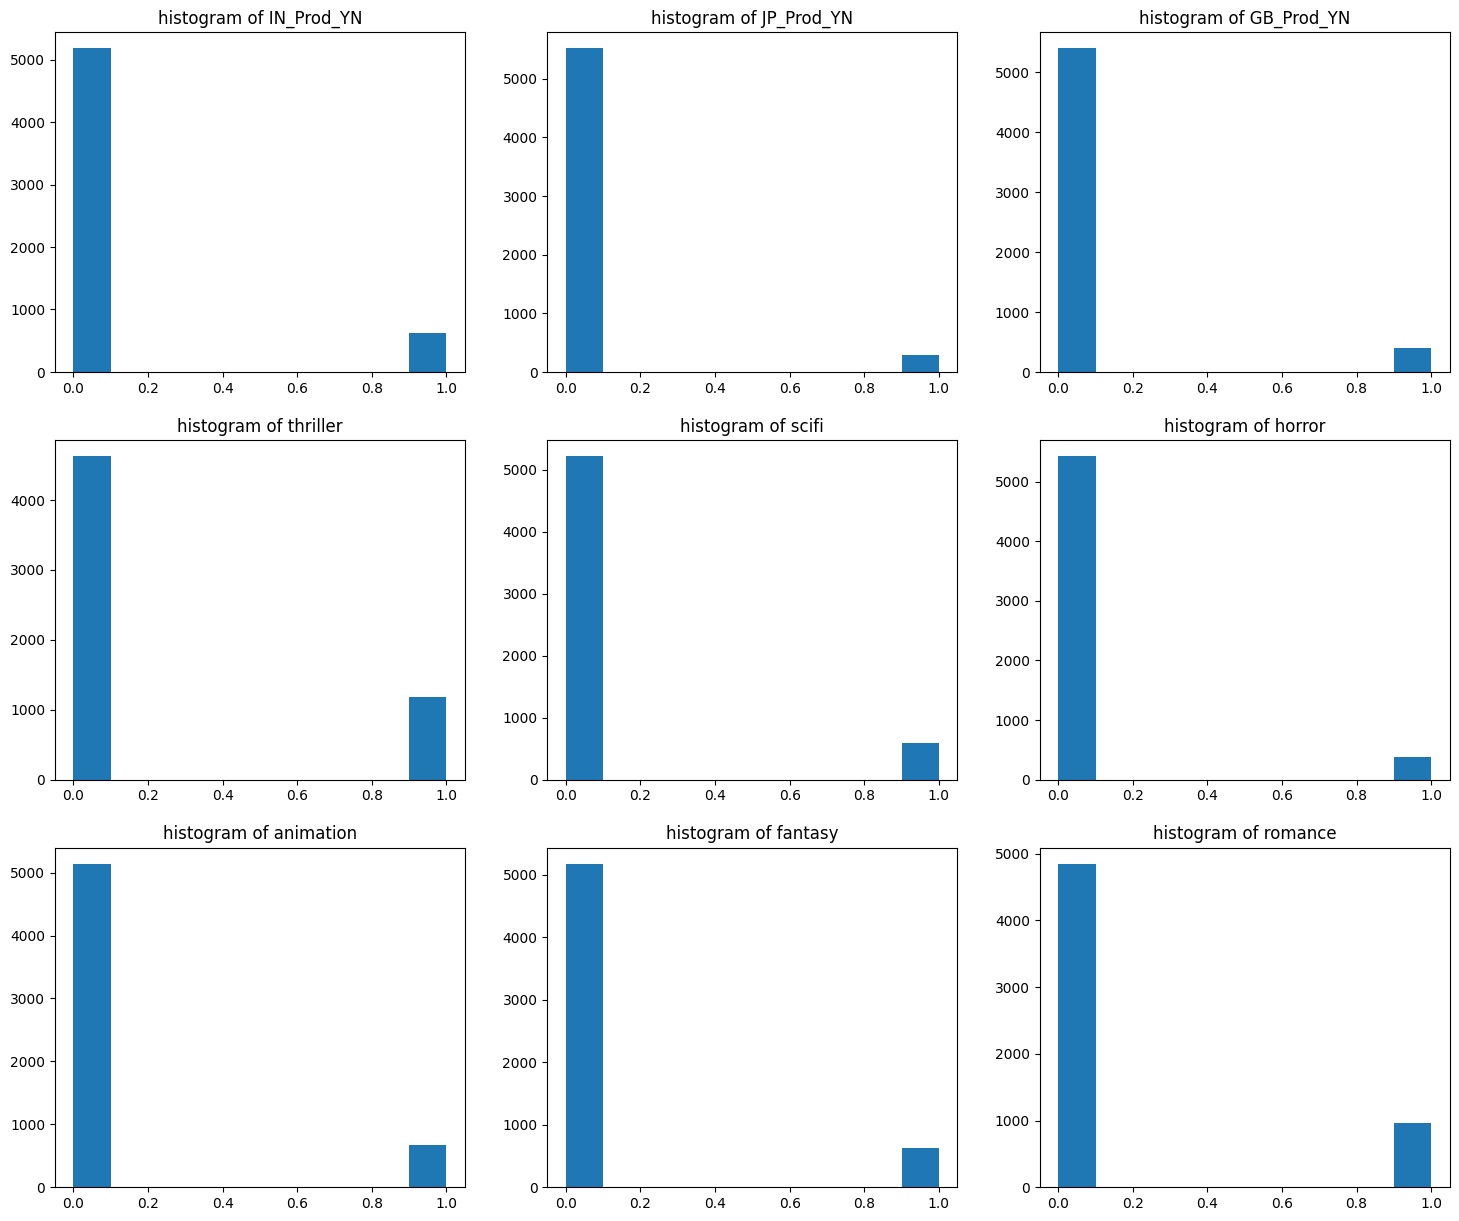

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(data_df["IN_Prod_YN"])
plt.title("histogram of IN_Prod_YN")

plt.subplot(3, 3, 2)
plt.hist(data_df["JP_Prod_YN"])
plt.title("histogram of JP_Prod_YN")

plt.subplot(3, 3, 3)
plt.hist(data_df["GB_Prod_YN"])
plt.title("histogram of GB_Prod_YN")

plt.subplot(3, 3, 4)
plt.hist(data_df["thriller"])
plt.title("histogram of thriller")

plt.subplot(3, 3, 5)
plt.hist(data_df["scifi"])
plt.title("histogram of scifi")

plt.subplot(3, 3, 6)
plt.hist(data_df["horror"])
plt.title("histogram of horror")

plt.subplot(3, 3, 7)
plt.hist(data_df["animation"])
plt.title("histogram of animation")

plt.subplot(3, 3, 8)
plt.hist(data_df["fantasy"])
plt.title("histogram of fantasy")

plt.subplot(3, 3, 9)
plt.hist(data_df["romance"])
plt.title("histogram of romance")


plt.show()

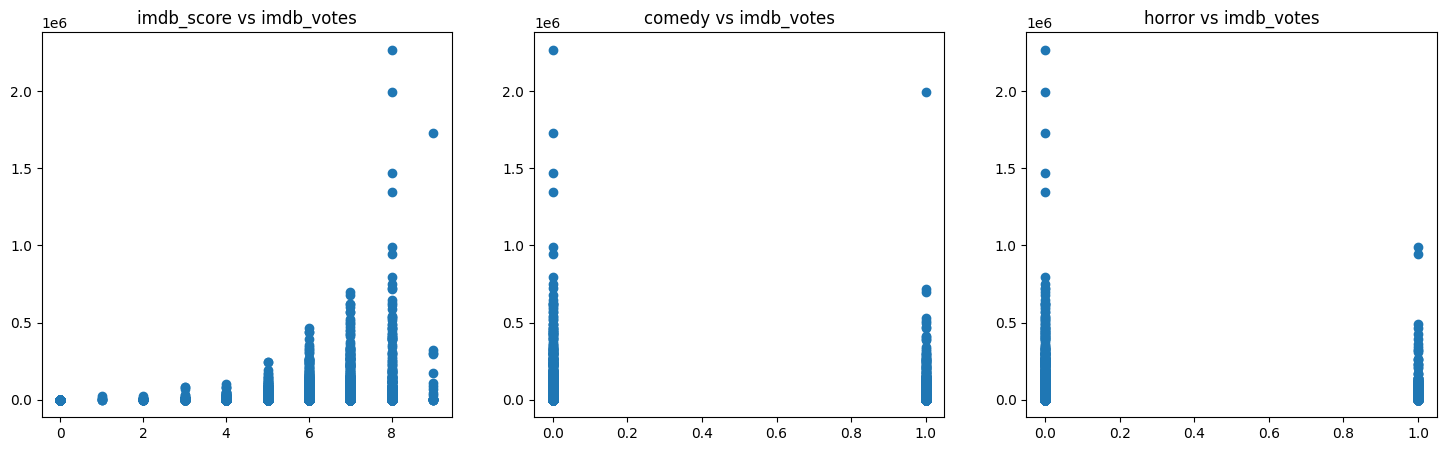

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["imdb_score"], df["imdb_votes"])
plt.title("imdb_score vs imdb_votes")

plt.subplot(1,3,2)
plt.scatter(data_df["comedy"], df["imdb_votes"])
plt.title("comedy vs imdb_votes")

plt.subplot(1,3,3)
plt.scatter(data_df["horror"], df["imdb_votes"])
plt.title("horror vs imdb_votes")

plt.show()

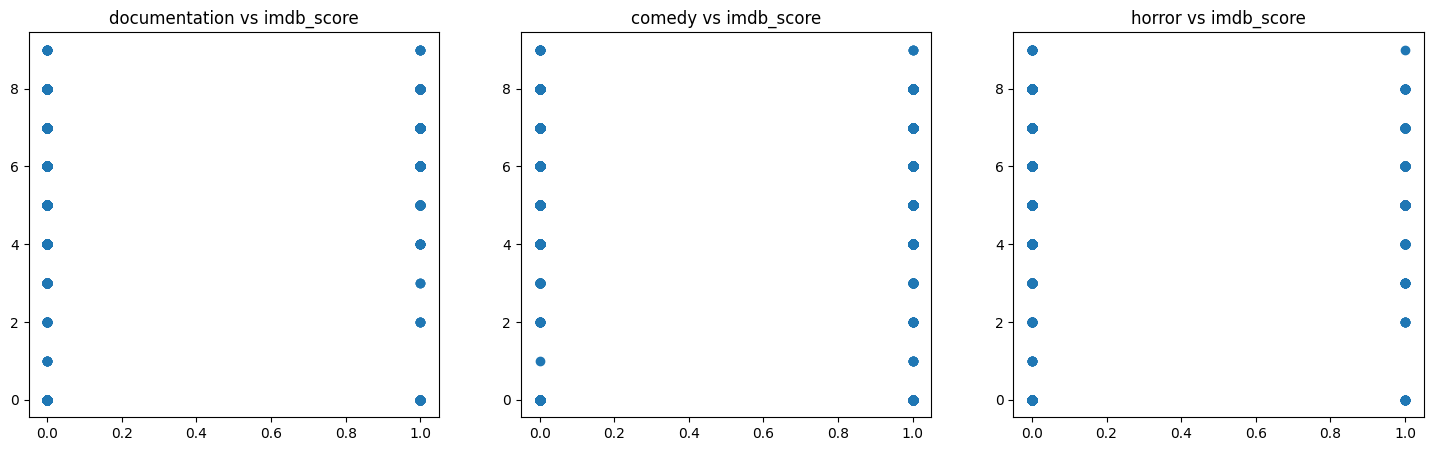

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["documentation"], df["imdb_score"])
plt.title("documentation vs imdb_score")

plt.subplot(1,3,2)
plt.scatter(data_df["comedy"], df["imdb_score"])
plt.title("comedy vs imdb_score")

plt.subplot(1,3,3)
plt.scatter(data_df["horror"], df["imdb_score"])
plt.title("horror vs imdb_score")

plt.show()

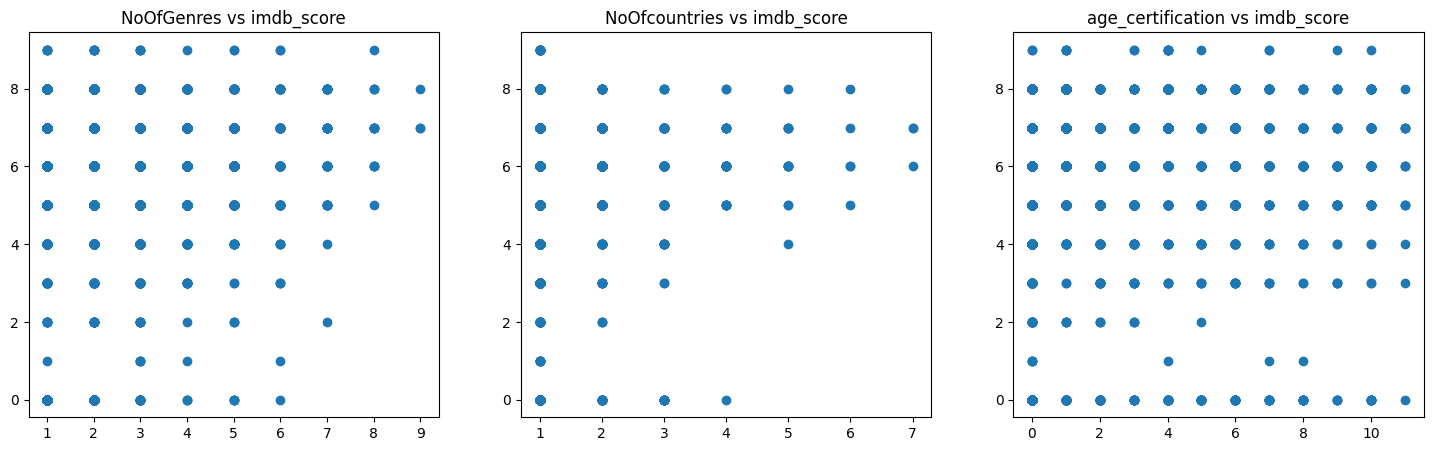

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["NoOfGenres"], df["imdb_score"])
plt.title("NoOfGenres vs imdb_score")

plt.subplot(1,3,2)
plt.scatter(data_df["NoOfcountries"], df["imdb_score"])
plt.title("NoOfcountries vs imdb_score")

plt.subplot(1,3,3)
plt.scatter(data_df["age_certification"], df["imdb_score"])
plt.title("age_certification vs imdb_score")

plt.show()

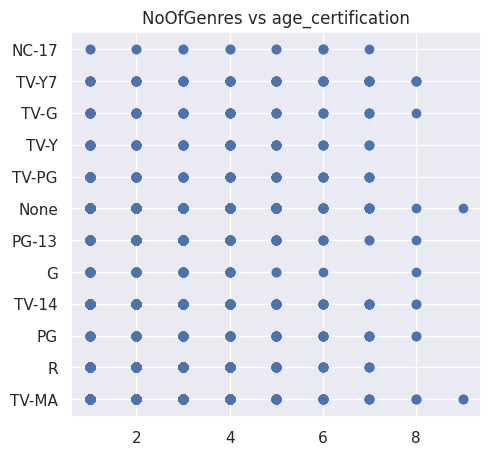

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["NoOfGenres"], df["age_certification"])
plt.title("NoOfGenres vs age_certification")

plt.show()

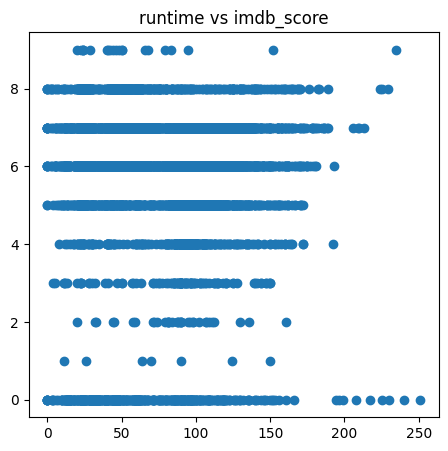

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(data_df["runtime"], df["imdb_score"])
plt.title("runtime vs imdb_score")

plt.show()

In [ ]:
# Get correlation matrix
data_df.corr()

release_year  age_certification   runtime   seasons  \
release_year           1.000000          -0.098037 -0.211076 -0.118862   
age_certification     -0.098037           1.000000 -0.252841  0.307988   
runtime               -0.211076          -0.252841  1.000000 -0.431264   
seasons               -0.118862           0.307988 -0.431264  1.000000   
imdb_score            -0.100780           0.101027  0.026309  0.157846   
imdb_votes            -0.192738           0.087043  0.140372  0.062270   
NoOfGenres            -0.093395           0.210786  0.030289  0.138048   
NoOfcountries         -0.040778          -0.010010  0.123875 -0.085766   
HowMuchOld            -1.000000           0.098037  0.211076  0.118862   
show_type              0.118743           0.326133 -0.725828  0.551514   
US_Prod_YN            -0.056012           0.169619 -0.125992  0.070869   
IN_Prod_YN            -0.135316          -0.067427  0.422863 -0.121480   
JP_Prod_YN            -0.029089           0.095718 -0.112542  0.059250   
GB_Prod_YN            -0.015072           0.047324 -0.014774  0.027004   
KR_Prod_YN             0.064748           0.002846 -0.047499  0.033510   
ES_Prod_YN             0.060700          -0.059474  0.021763 -0.020003   
FR_Prod_YN            -0.006435          -0.038213  0.021564 -0.032396   
CA_Prod_YN            -0.011668           0.057962 -0.028569  0.032540   
MX_Prod_YN             0.047741          -0.055242 -0.019703 -0.018434   
BR_Prod_YN             0.050143          -0.037069 -0.019041 -0.016980   
OldOrNew               0.780706          -0.034384 -0.154179 -0.101074   
action                -0.092468           0.148298  0.058185  0.067194   
thriller              -0.005194          -0.066761  0.175253 -0.041875   
scifi                 -0.004515           0.176697 -0.161322  0.156782   
horror                 0.004364          -0.017248  0.032858 -0.012672   
animation             -0.013582           0.340433 -0.319306  0.173335   
fantasy               -0.021116           0.213306 -0.108942  0.102127   
romance               -0.068034          -0.005979  0.206295 -0.049827   
family                -0.040477           0.318035 -0.166706  0.152605   
european              -0.061745          -0.028446  0.083183  0.004004   
crime                 -0.018201          -0.085786  0.094083  0.003236   
comedy                -0.051640           0.057028 -0.050048  0.025133   
sport                  0.013090           0.021424  0.019143 -0.003715   
drama                 -0.054696          -0.067178  0.251474 -0.002749   
documentation          0.067968          -0.092669 -0.108098 -0.050709   
war                   -0.066624          -0.009737  0.058752 -0.009153   
music                  0.014328           0.003528  0.011945 -0.016539   
western               -0.054663           0.020684  0.029318  0.014191   
history                0.009929          -0.005455  0.054848 -0.010712   
reality                0.062650           0.098548 -0.183636  0.191916   

                   imdb_score  imdb_votes  NoOfGenres  NoOfcountries  \
release_year        -0.100780   -0.192738   -0.093395      -0.040778   
age_certification    0.101027    0.087043    0.210786      -0.010010   
runtime              0.026309    0.140372    0.030289       0.123875   
seasons              0.157846    0.062270    0.138048      -0.085766   
imdb_score           1.000000    0.166455    0.248120       0.011053   
imdb_votes           0.166455    1.000000    0.126618       0.103492   
NoOfGenres           0.248120    0.126618    1.000000       0.075229   
NoOfcountries        0.011053    0.103492    0.075229       1.000000   
HowMuchOld           0.100780    0.192738    0.093395       0.040778   
show_type            0.170545   -0.046170    0.112047      -0.167111   
US_Prod_YN           0.038959    0.206784   -0.029651       0.114659   
IN_Prod_YN           0.017654   -0.044696    0.019832      -0.072485   
JP_Prod_YN           0.042713   -0.024042    0.1

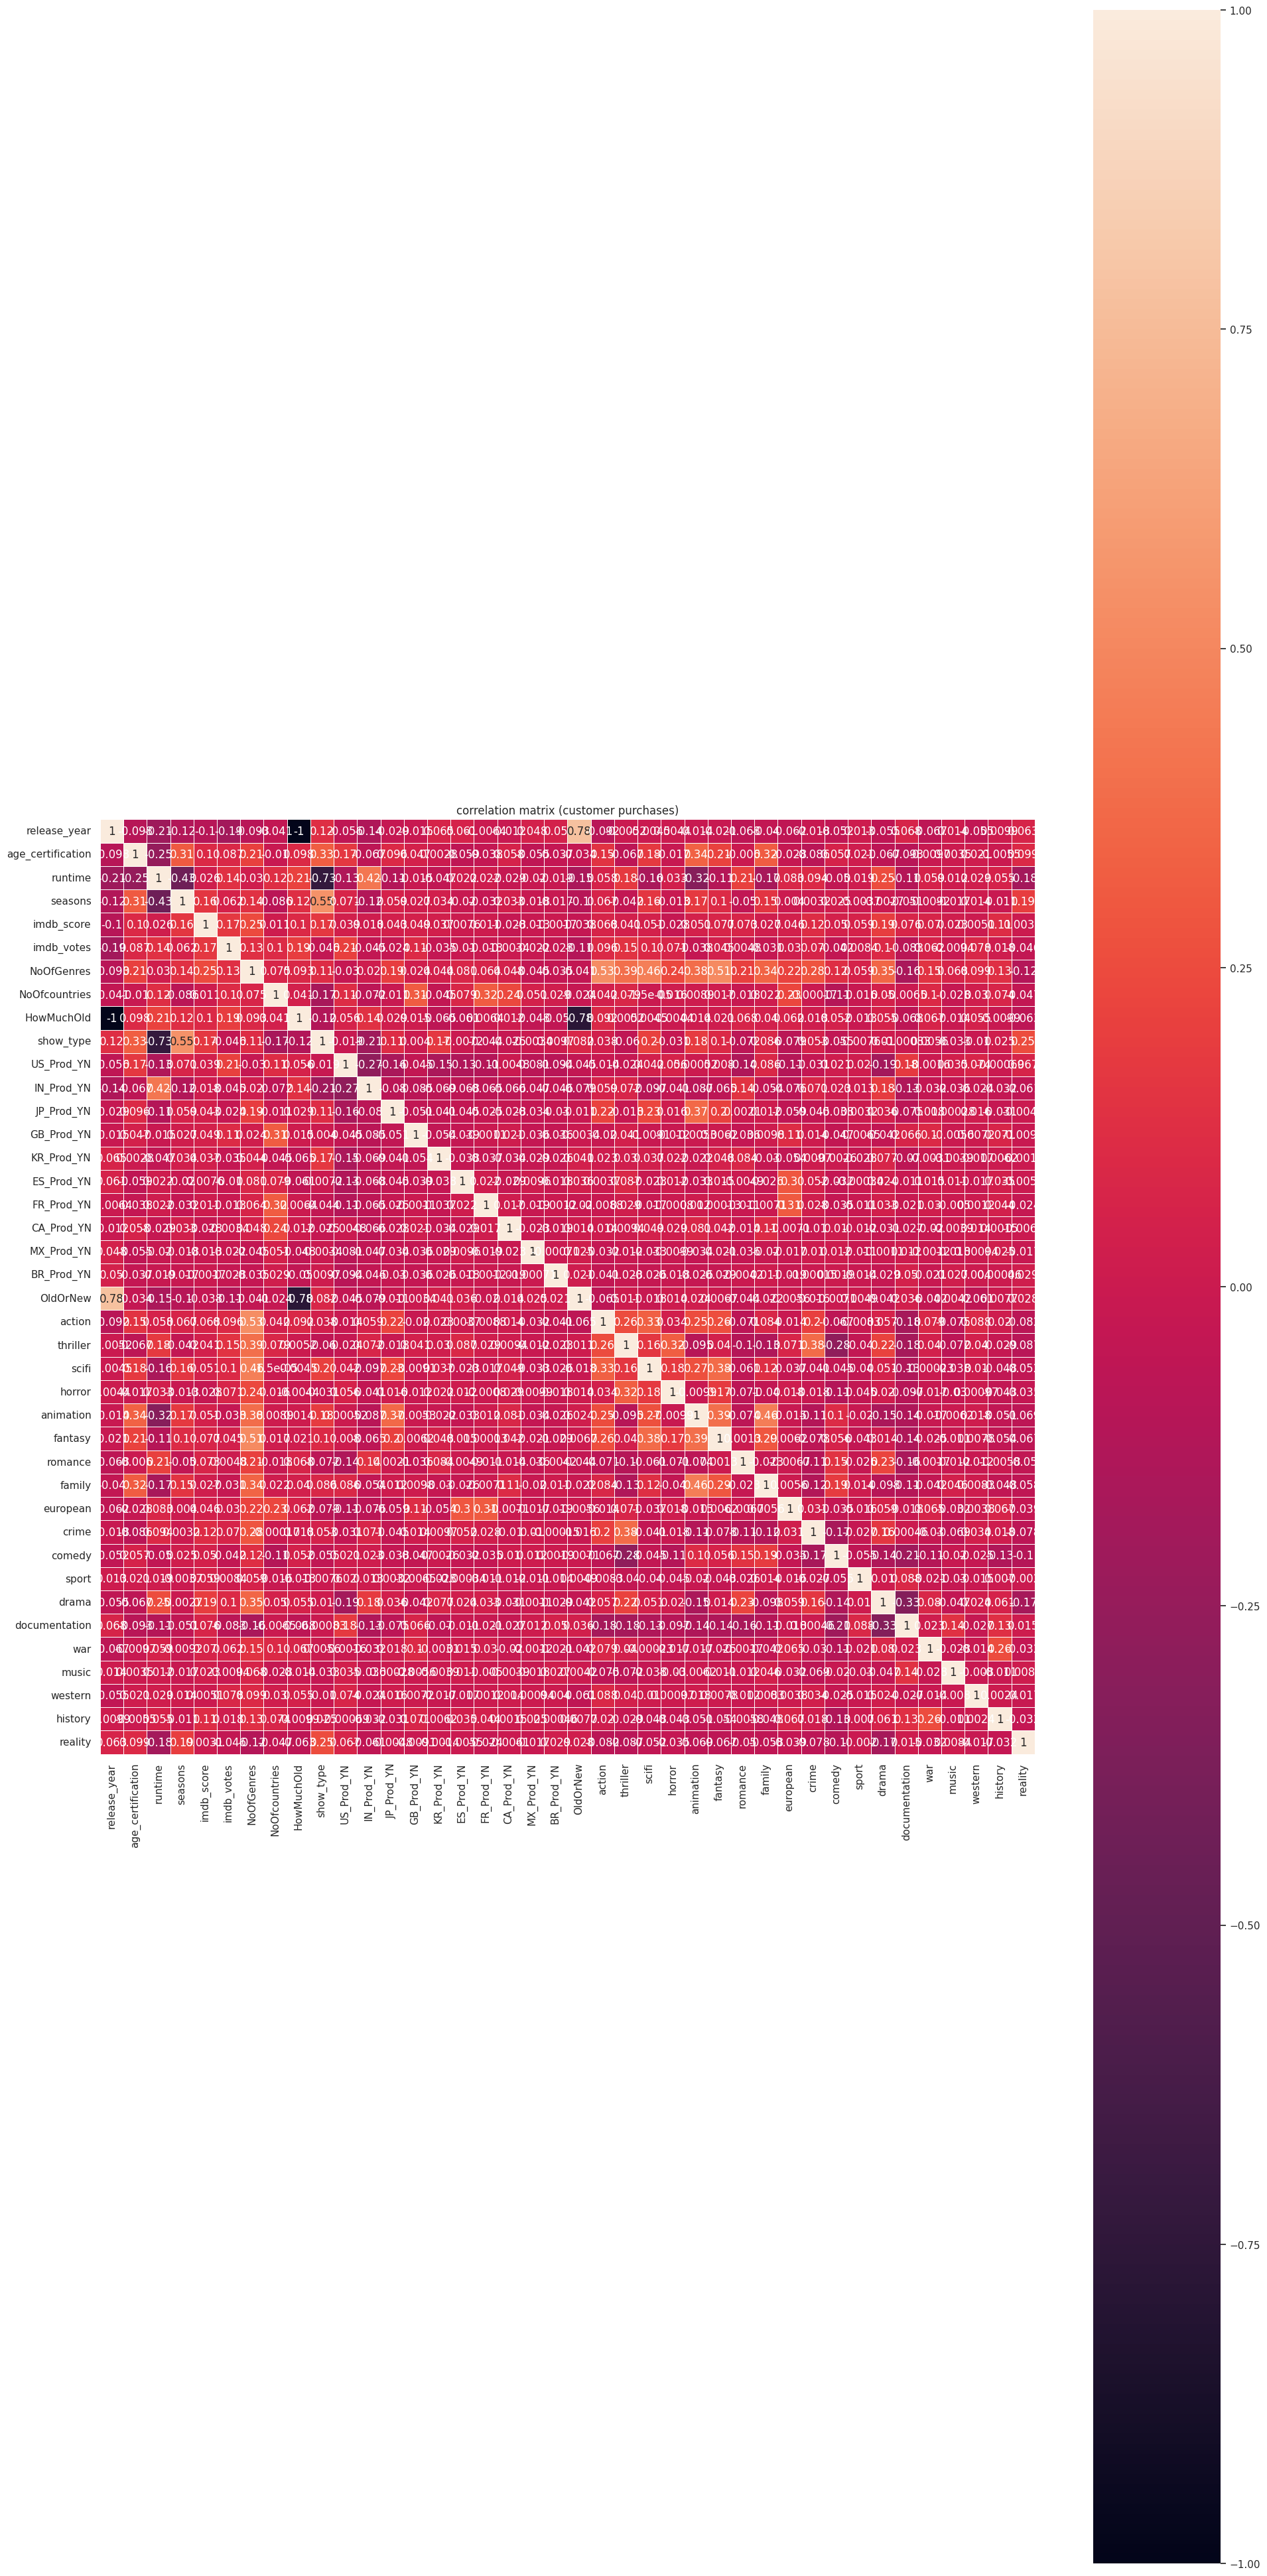

In [ ]:
# Make the correlation matrices
corrmat_df = data_df.corr()

# Heat maps are a great way to get
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(50,50))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (customer purchases)")

plt.show()

# Try to match the correlation numbers
# to the scatter plots above to get a
# sense of what each magnitude of
# correlation can look like.


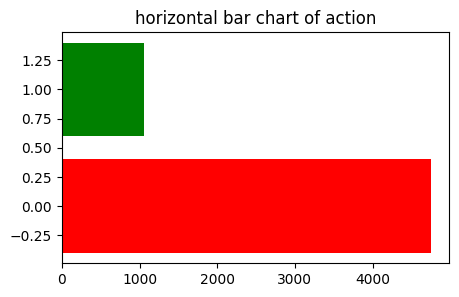

In [ ]:
# Bar chart of action
plt.figure(figsize=(5,3))
plt.barh(data_df.groupby("action")["action"].count().index,
        data_df.groupby("action")["action"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of action")

plt.show()

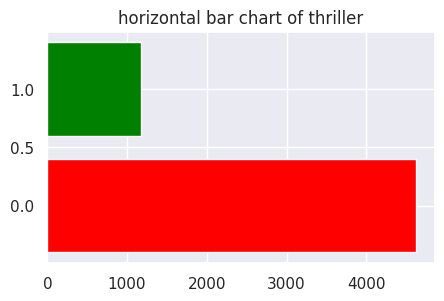

In [ ]:
# Bar chart of thriller
plt.figure(figsize=(5,3))
plt.barh(data_df.groupby("thriller")["thriller"].count().index,
        data_df.groupby("thriller")["thriller"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of thriller")

plt.show()

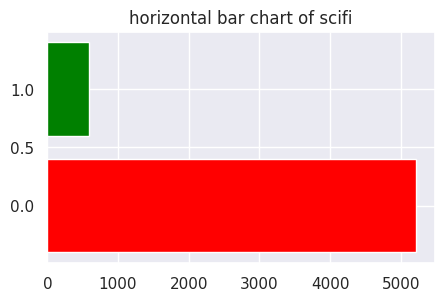

In [ ]:
# Bar chart of thriller
plt.figure(figsize=(5,3))
plt.barh(data_df.groupby("scifi")["scifi"].count().index,
        data_df.groupby("scifi")["scifi"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of scifi")

plt.show()

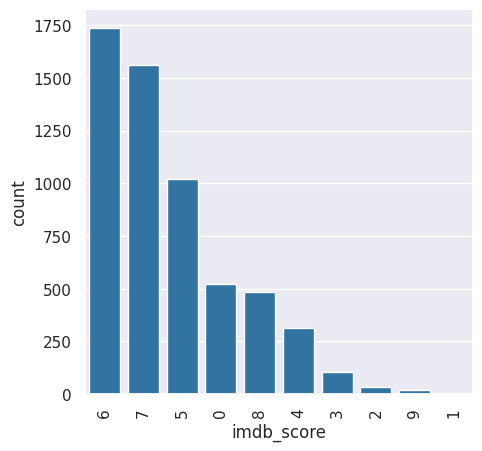

In [ ]:
plt.figure(figsize= (5,5))

sns.countplot(x ='imdb_score', data=data_df, color='#1f77b4', order = data_df['imdb_score'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

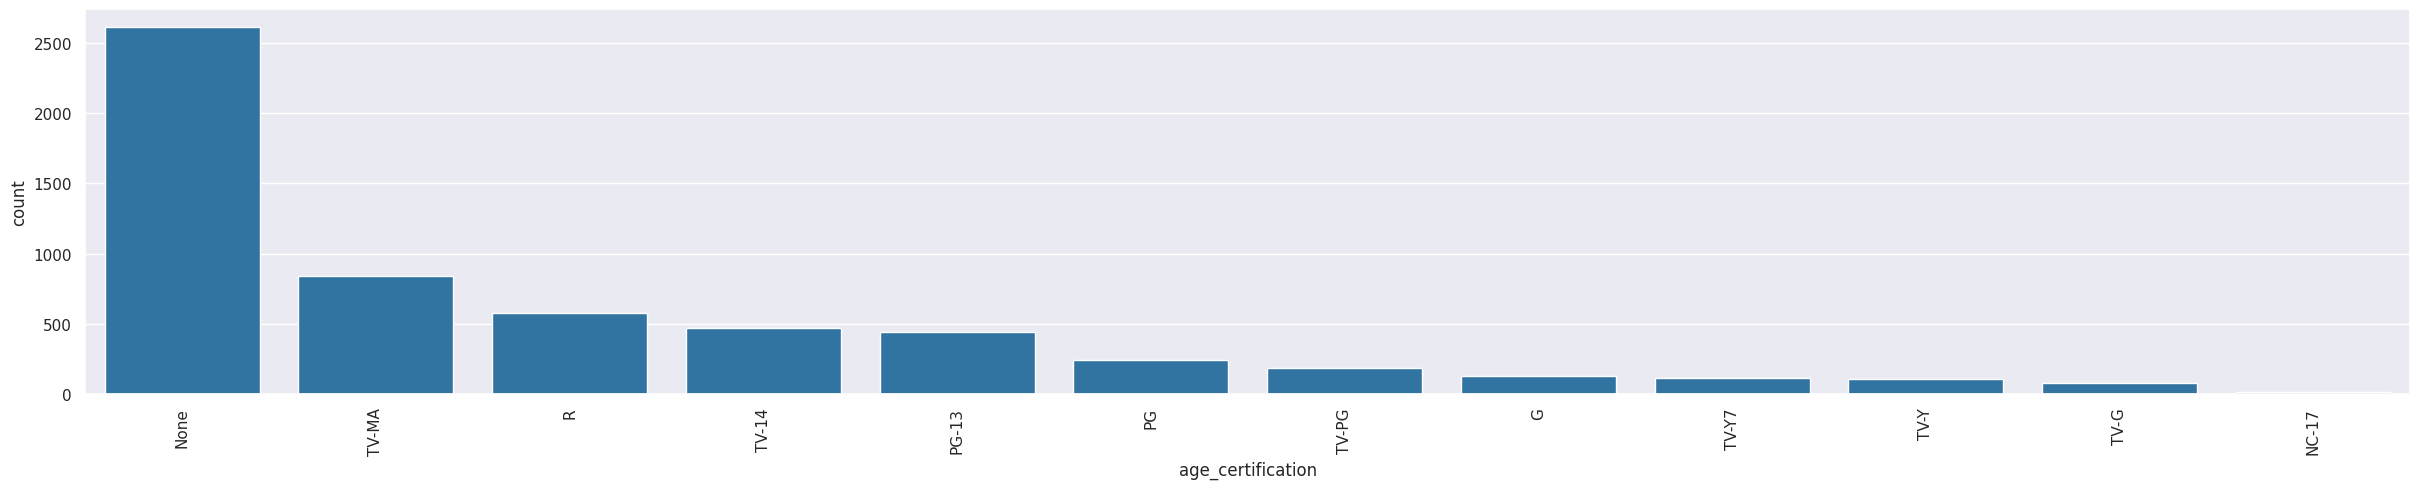

In [ ]:
plt.figure(figsize= (30,5))

sns.countplot(x ='age_certification', data=df, color='#1f77b4', order = df['age_certification'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

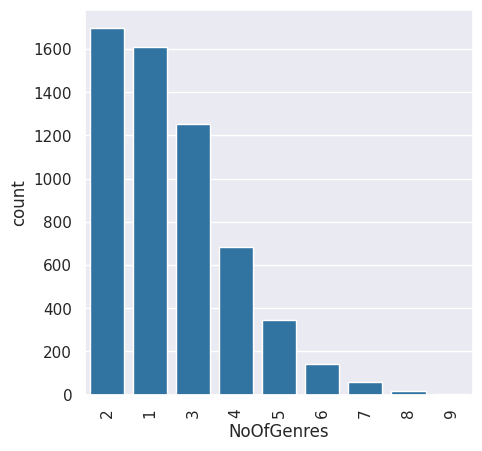

In [ ]:
plt.figure(figsize= (5,5))

sns.countplot(x ='NoOfGenres', data=data_df, color='#1f77b4', order = data_df['NoOfGenres'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

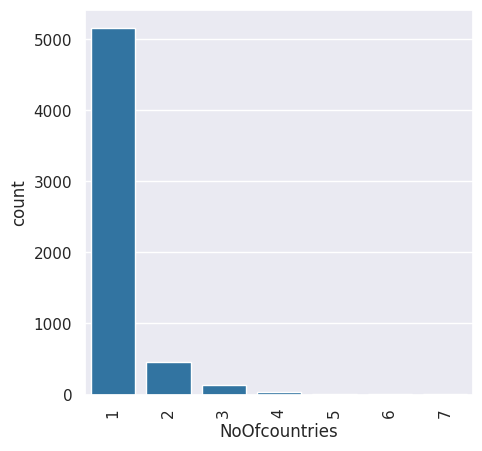

In [ ]:
plt.figure(figsize= (5,5))

sns.countplot(x ='NoOfcountries', data=data_df, color='#1f77b4', order = data_df['NoOfcountries'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

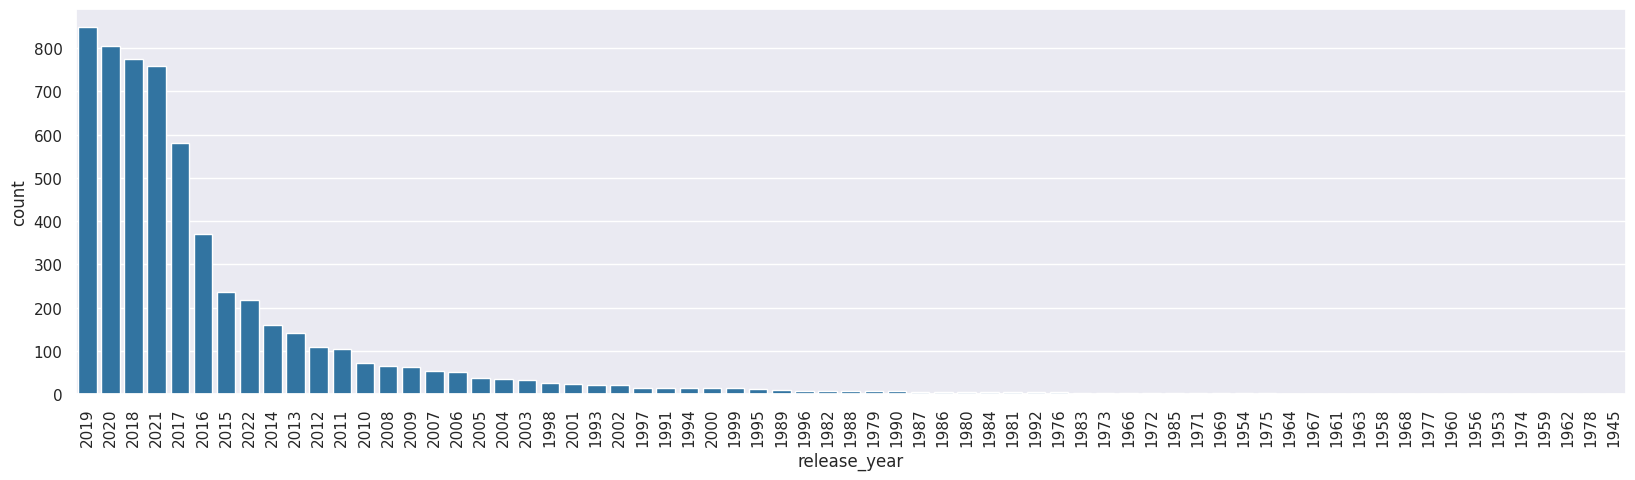

In [ ]:
plt.figure(figsize= (20,5))

sns.countplot(x ='release_year', data=data_df, color='#1f77b4', order = data_df['release_year'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.action.value_counts()

0    4753
1    1053
Name: action, dtype: int64

In [ ]:
df.thriller.value_counts()


0    4628
1    1178
Name: thriller, dtype: int64

In [ ]:
df.scifi.value_counts()


0    5219
1     587
Name: scifi, dtype: int64

In [ ]:
df.horror.value_counts()

0    5426
1     380
Name: horror, dtype: int64

In [ ]:
df.animation.value_counts()

0    5141
1     665
Name: animation, dtype: int64

In [ ]:
df.fantasy.value_counts()


0    5175
1     631
Name: fantasy, dtype: int64

In [ ]:
df.romance.value_counts()


0    4848
1     958
Name: romance, dtype: int64

In [ ]:
df.family.value_counts()


0    5184
1     622
Name: family, dtype: int64

In [ ]:
df.european.value_counts()


0    5346
1     460
Name: european, dtype: int64

In [ ]:
df.crime.value_counts()


0    4915
1     891
Name: crime, dtype: int64

In [ ]:
df.comedy.value_counts()


0    3537
1    2269
Name: comedy, dtype: int64

In [ ]:
df.sport.value_counts()


0    5640
1     166
Name: sport, dtype: int64

In [ ]:
df.drama.value_counts()


0    2905
1    2901
Name: drama, dtype: int64

In [ ]:
df.documentation.value_counts()


0    4896
1     910
Name: documentation, dtype: int64

In [ ]:
df.war.value_counts()


0    5657
1     149
Name: war, dtype: int64

In [ ]:
df.music.value_counts()


0    5568
1     238
Name: music, dtype: int64

In [ ]:
df.western.value_counts()


0    5762
1      44
Name: western, dtype: int64

In [ ]:
df.history.value_counts()


0    5573
1     233
Name: history, dtype: int64

In [ ]:
df.reality.value_counts()

0    5583
1     223
Name: reality, dtype: int64

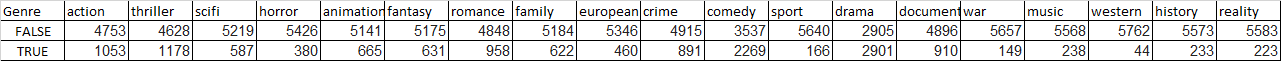

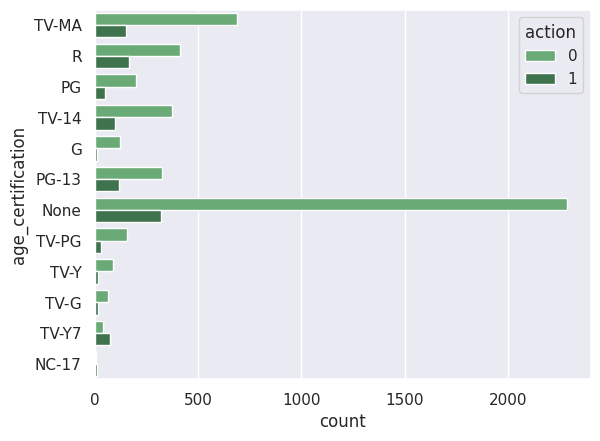

In [ ]:
sns.countplot(y="age_certification", hue="action", data=df, palette="Greens_d")
plt.show()

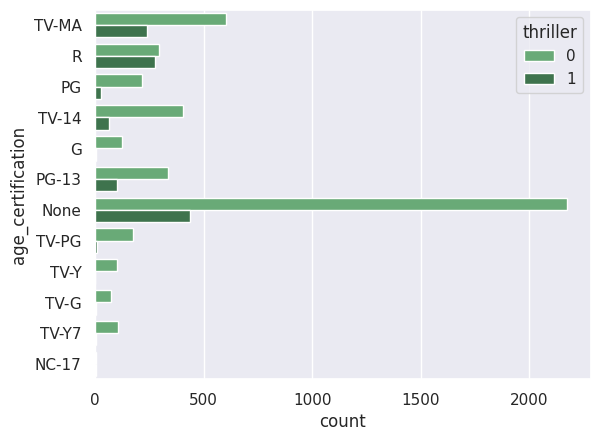

In [ ]:
sns.countplot(y="age_certification", hue="thriller", data=df, palette="Greens_d")
plt.show()

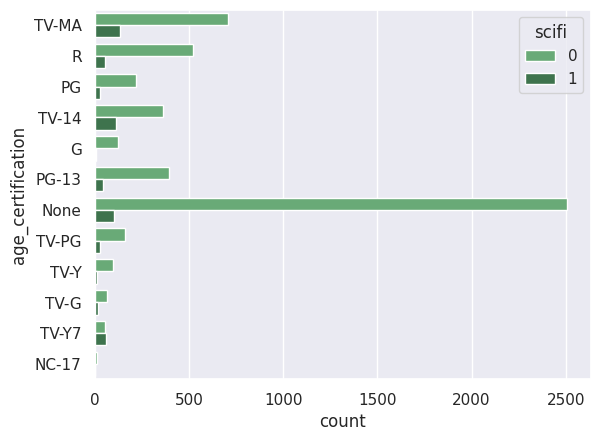

In [ ]:
sns.countplot(y="age_certification", hue="scifi", data=df, palette="Greens_d")
plt.show()

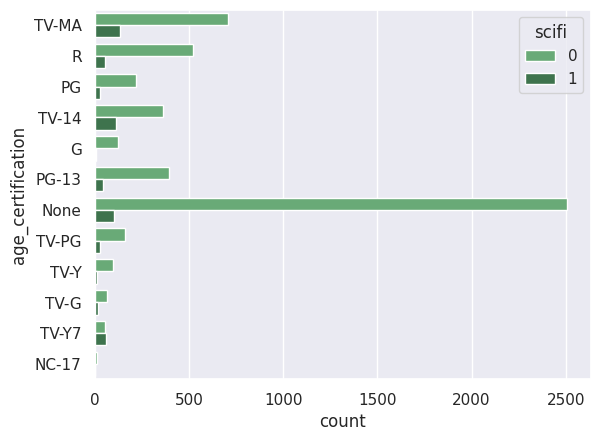

In [ ]:
sns.countplot(y="age_certification", hue="scifi", data=df, palette="Greens_d")
plt.show()

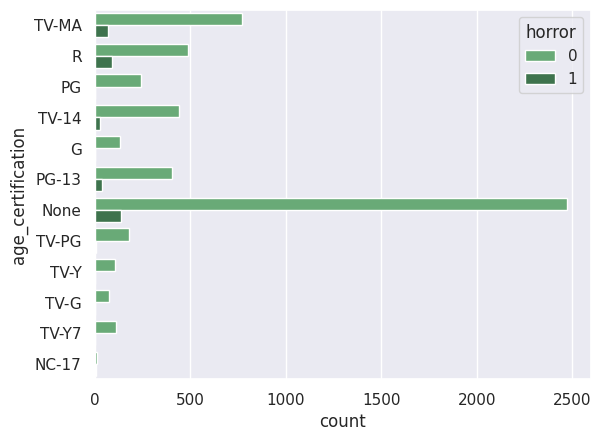

In [ ]:
sns.countplot(y="age_certification", hue="horror", data=df, palette="Greens_d")
plt.show()

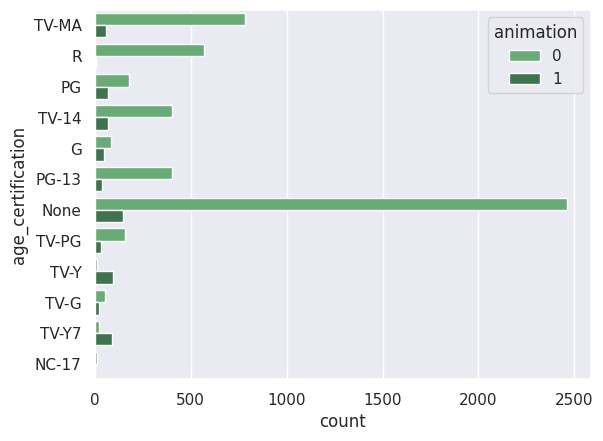

In [ ]:
sns.countplot(y="age_certification", hue="animation", data=df, palette="Greens_d")
plt.show()

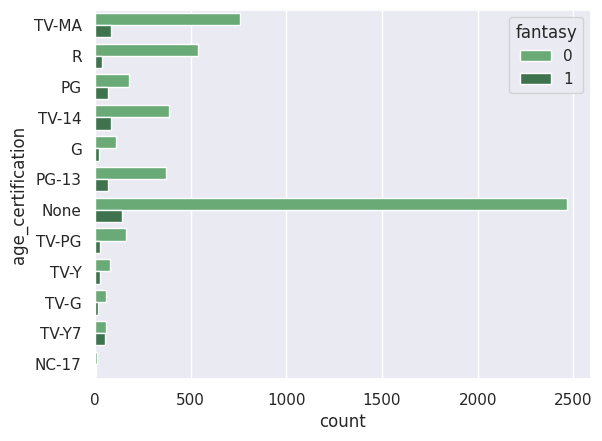

In [ ]:
sns.countplot(y="age_certification", hue="fantasy", data=df, palette="Greens_d")
plt.show()

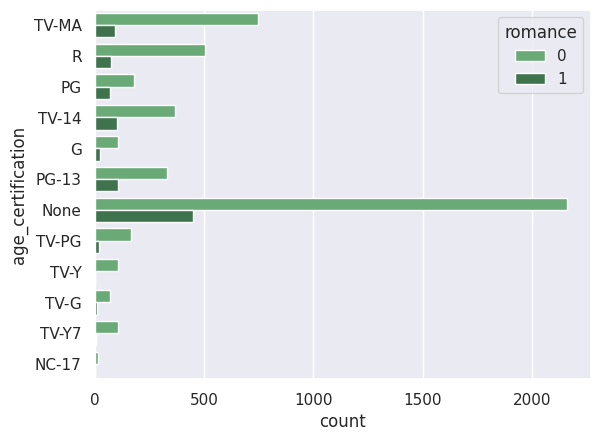

In [ ]:
sns.countplot(y="age_certification", hue="romance", data=df, palette="Greens_d")
plt.show()

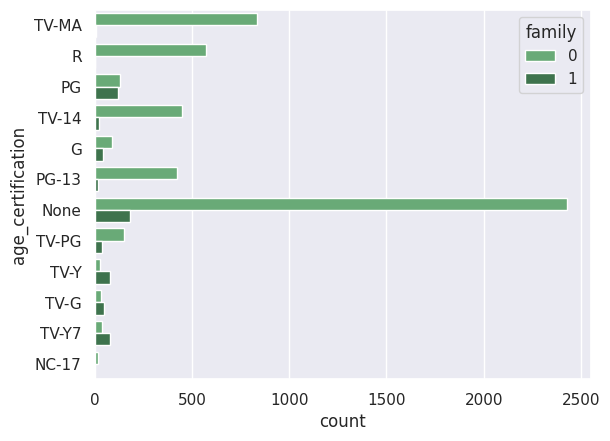

In [ ]:
sns.countplot(y="age_certification", hue="family", data=df, palette="Greens_d")
plt.show()

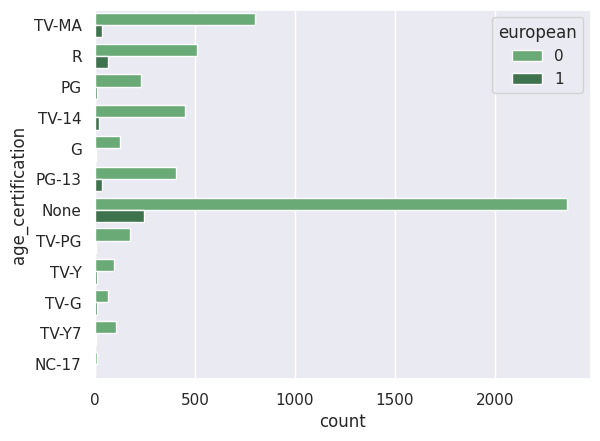

In [ ]:
sns.countplot(y="age_certification", hue="european", data=df, palette="Greens_d")
plt.show()

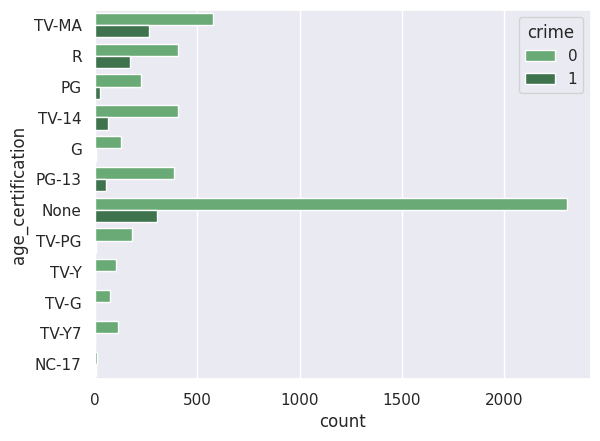

In [ ]:
sns.countplot(y="age_certification", hue="crime", data=df, palette="Greens_d")
plt.show()

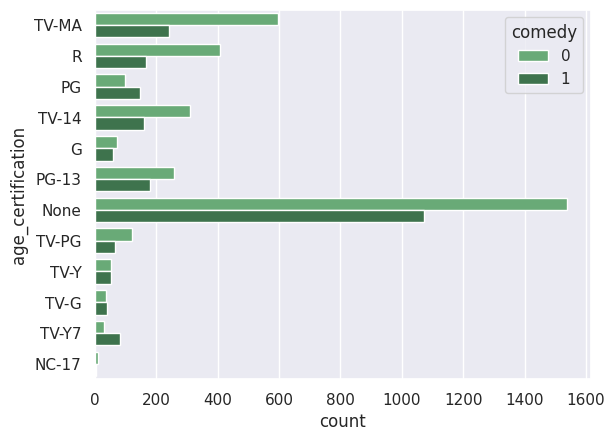

In [ ]:
sns.countplot(y="age_certification", hue="comedy", data=df, palette="Greens_d")
plt.show()

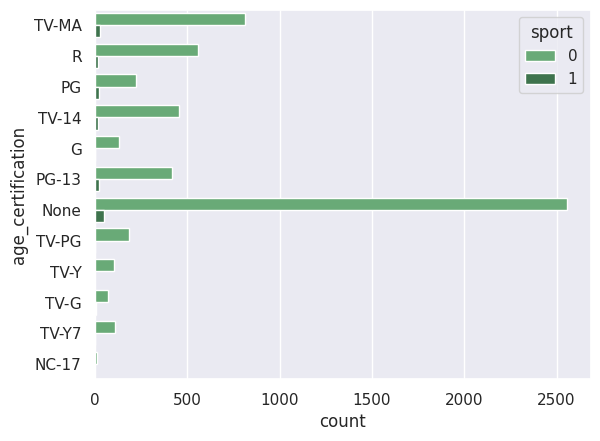

In [ ]:
sns.countplot(y="age_certification", hue="sport", data=df, palette="Greens_d")
plt.show()

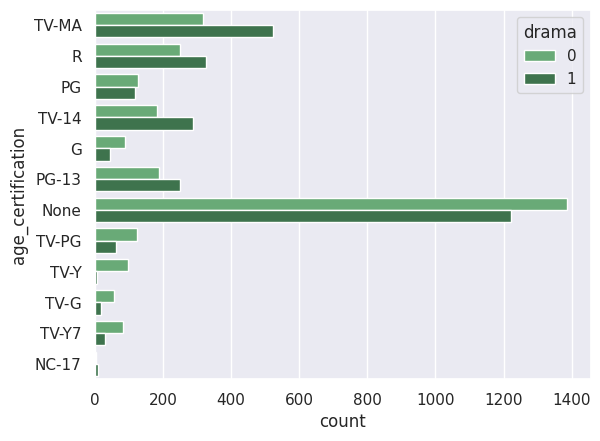

In [ ]:
sns.countplot(y="age_certification", hue="drama", data=df, palette="Greens_d")
plt.show()

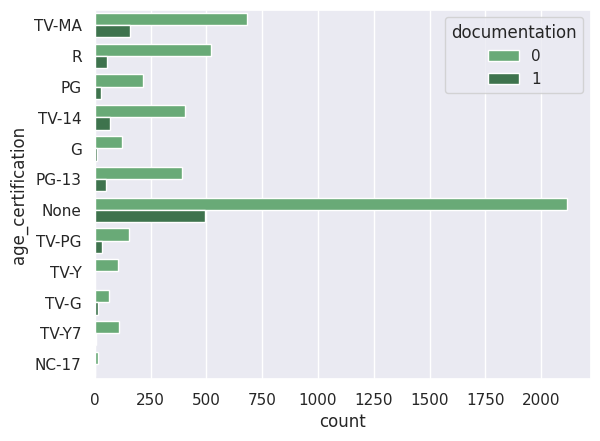

In [ ]:
sns.countplot(y="age_certification", hue="documentation", data=df, palette="Greens_d")
plt.show()

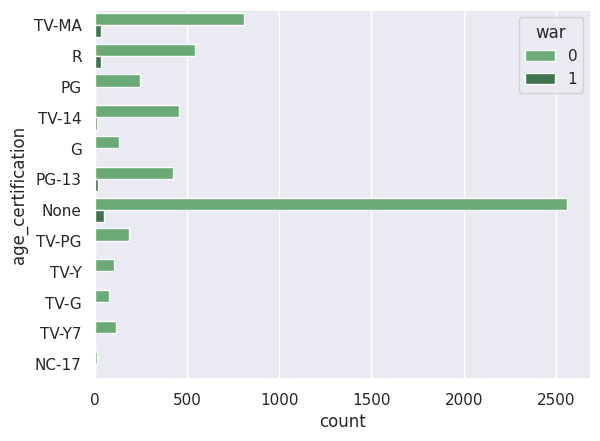

In [ ]:
sns.countplot(y="age_certification", hue="war", data=df, palette="Greens_d")
plt.show()

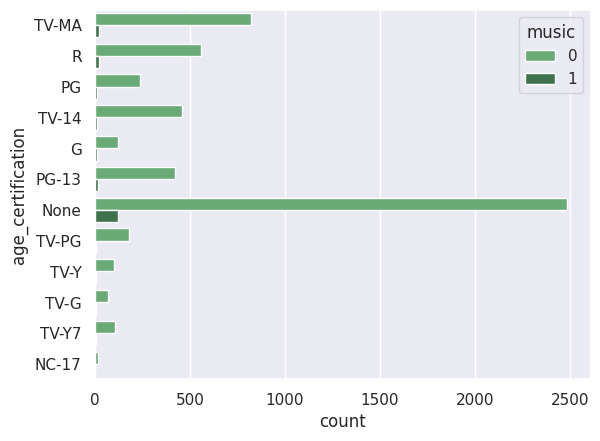

In [ ]:
sns.countplot(y="age_certification", hue="music", data=df, palette="Greens_d")
plt.show()

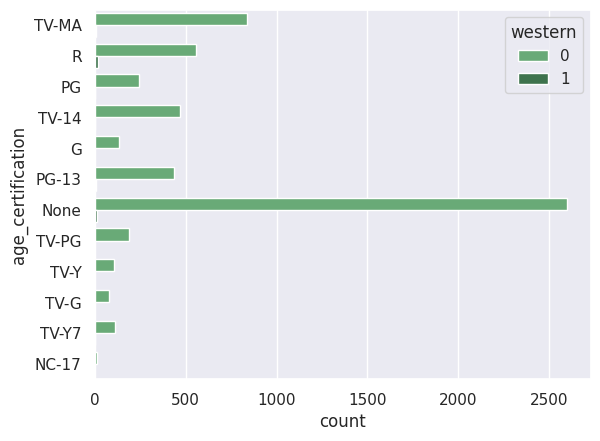

In [ ]:
sns.countplot(y="age_certification", hue="western", data=df, palette="Greens_d")
plt.show()

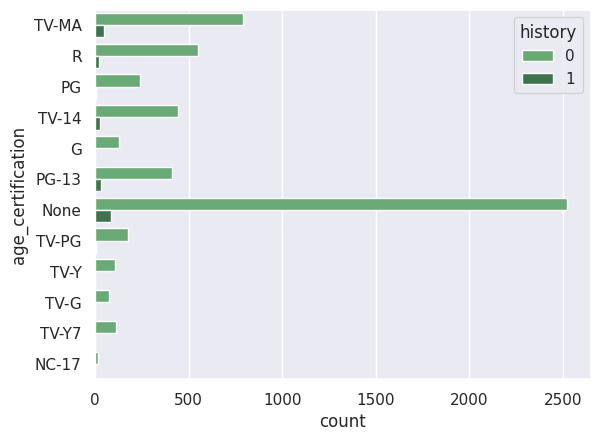

In [ ]:
sns.countplot(y="age_certification", hue="history", data=df, palette="Greens_d")
plt.show()

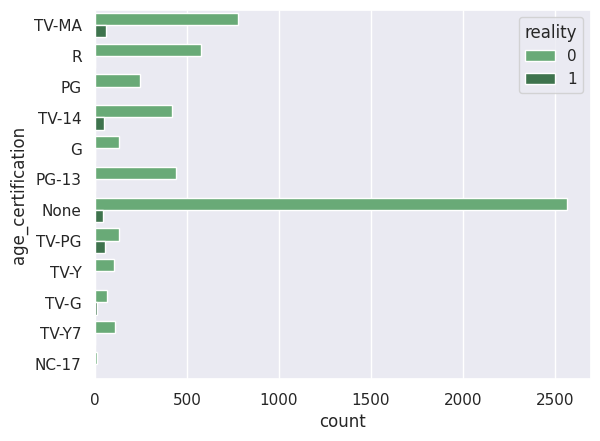

In [ ]:
sns.countplot(y="age_certification", hue="reality", data=df, palette="Greens_d")
plt.show()

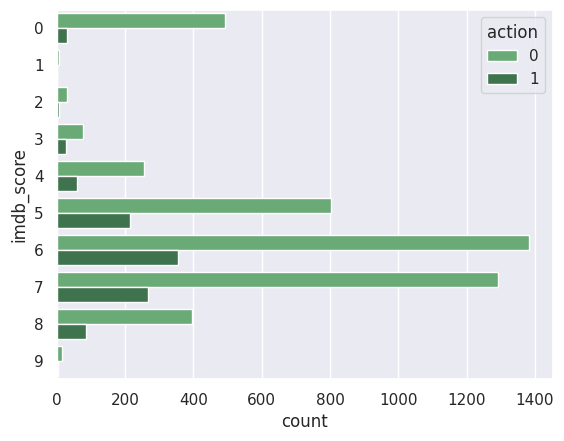

In [ ]:
sns.countplot(y="imdb_score", hue="action", data=df, palette="Greens_d")
plt.show()

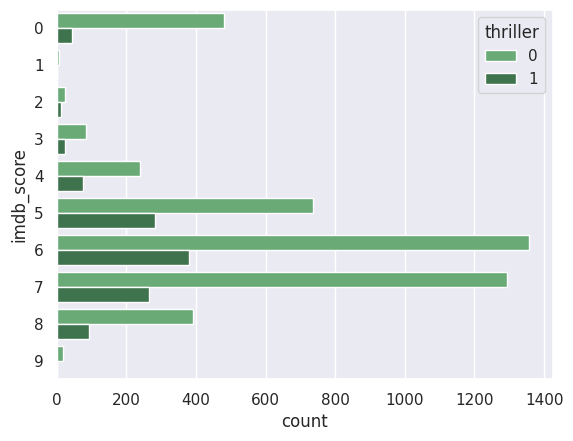

In [ ]:
sns.countplot(y="imdb_score", hue="thriller", data=df, palette="Greens_d")
plt.show()

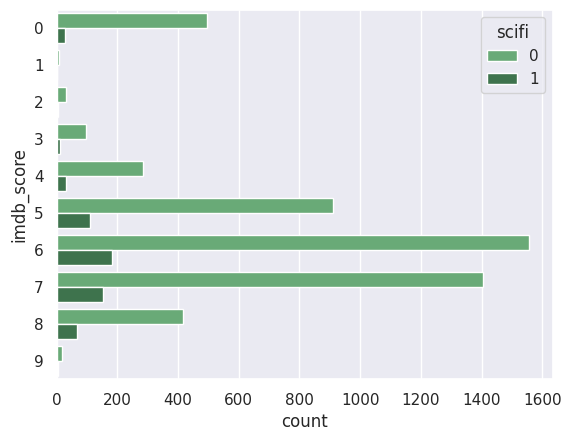

In [ ]:
sns.countplot(y="imdb_score", hue="scifi", data=df, palette="Greens_d")
plt.show()

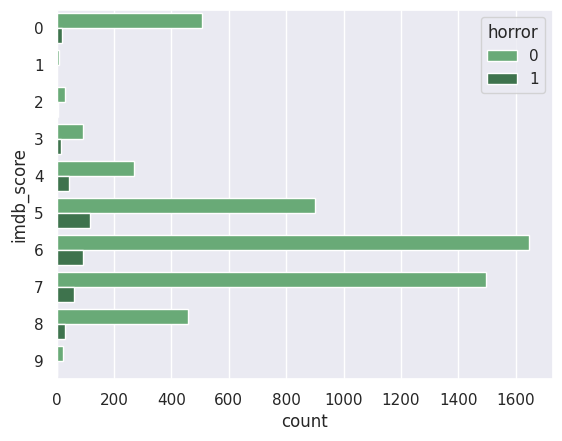

In [ ]:
sns.countplot(y="imdb_score", hue="horror", data=df, palette="Greens_d")
plt.show()

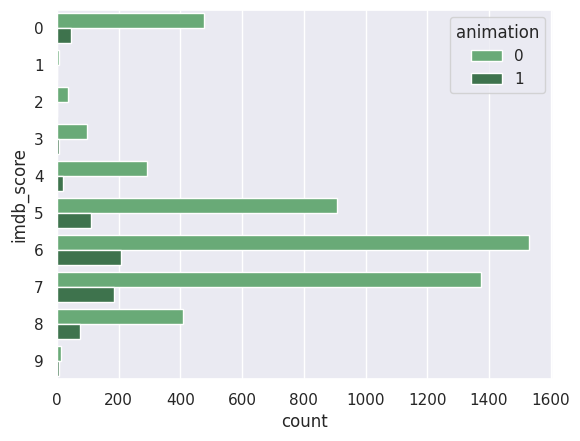

In [ ]:

sns.countplot(y="imdb_score", hue="animation", data=df, palette="Greens_d")
plt.show()

In [ ]:
top10_action_movies = df.query('type == "MOVIE"' and 'action == 1').sort_values(by = ['imdb_score'], ascending = False).head(10)

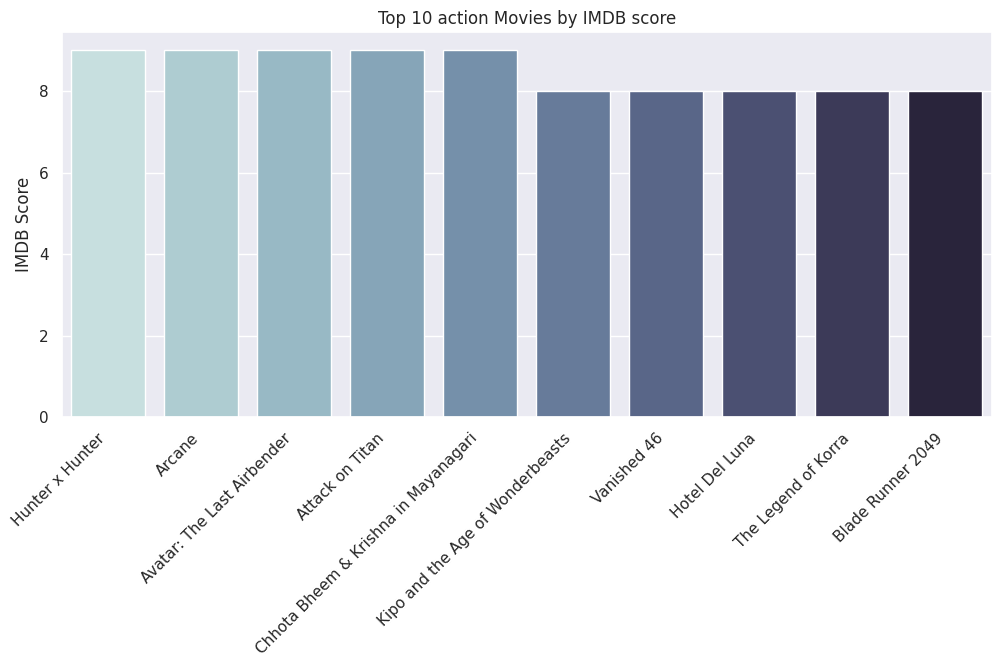

In [ ]:
plt.figure(figsize = [12,5])
plt.title('Top 10 action Movies by IMDB score')
ax = sns.barplot(x=top10_action_movies['title'], y=top10_action_movies['imdb_score'], palette="ch:start=.2,rot=-.3")
plt.ylabel('IMDB Score')
plt.xlabel('')

plt.xticks(rotation = 45, ha='right')
plt.show()

In [ ]:
top10_shows = df.query('type == "SHOW"').sort_values(by = ['imdb_score'], ascending = False).head(10)

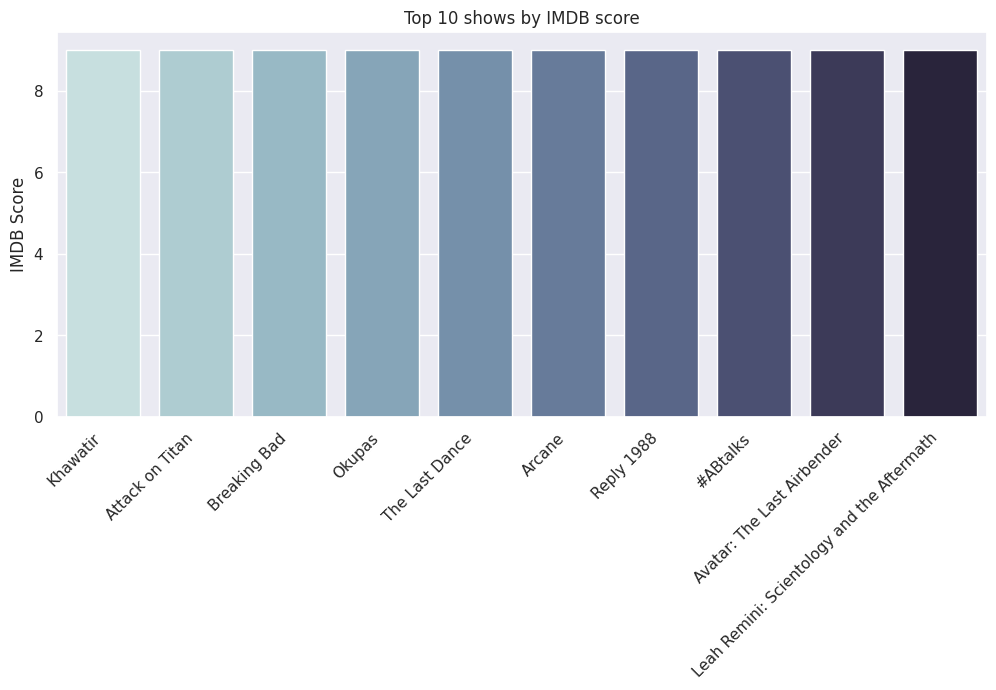

In [ ]:
plt.figure(figsize = [12,5])
plt.title('Top 10 shows by IMDB score')
ax = sns.barplot(x=top10_shows['title'], y=top10_shows['imdb_score'], palette="ch:start=.2,rot=-.3")
plt.ylabel('IMDB Score')
plt.xlabel('')

plt.xticks(rotation = 45, ha='right')
plt.show()

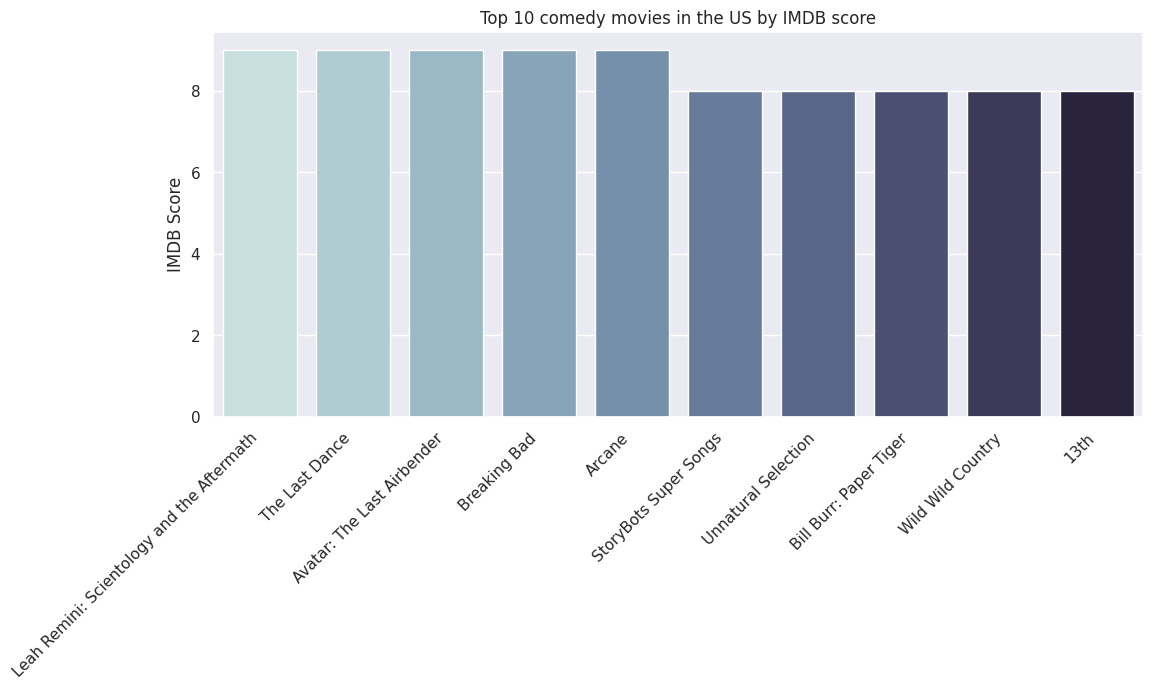

In [ ]:
top10_comedy_movies = df.query('type == "MOVIE"' and 'comedy == 1' and 'US_Prod_YN == 1').sort_values(by = ['imdb_score'], ascending = False).head(10)
plt.figure(figsize = [12,5])
plt.title('Top 10 comedy movies in the US by IMDB score')
ax = sns.barplot(x=top10_comedy_movies['title'], y=top10_comedy_movies['imdb_score'], palette="ch:start=.2,rot=-.3")
plt.ylabel('IMDB Score')
plt.xlabel('')

plt.xticks(rotation = 45, ha='right')
plt.show()